# Predicting Water Well Status in Tanzania using Machine Learning

## Executive Summary

___The problem:___  The government of Tanzania seeks to provide clean water to all of its citizens, but over 40% of the population still lacks access to clean water.  The government collaborated with Taarifa, a non-profit organization, to create a database of all of the water supply projects in the country. Data for each water supply project includes information about the project’s geographic location, local water abundance and quality, technical information (e.g., type of well), funder, installer, project administration, and more.

___Crowdsourcing machine learning to predict well function:___ DrivenData, a social enterprise that works with mission-driven organizations, is hosting a competition to predict water well status using machine learning algorithms. The dataset provided by DrivenData contains data for 59,400 water supply projects. There are 39 features in this dataset and three target classes (well status = ‘functional’, ‘non-functional’, or ‘functional; needs repair’).  Thus, this is a **multi-class classification problem.**

___My approach:___ For this project, I developed functions to customize data visualizations during the exploration phase and evaluated several different supervised machine learning models for predicting water well status. I also employed a few different approaches to address class imbalances, significantly improving performance around costly ‘false-negative’ errors (predicting wells to be ‘functional’, when in fact they were ‘non-functional’ or ‘functional needing repair’).  

For an overview of the functions I developed and deployed, check out my blog post at https://github.com/gdurante2019/gdurante2019.github.io/blob/master/_posts/2020-07-22-data_science_toolbox_function_to_create_top_n_values.markdown.

___Findings:___ In this project, I found that there is a significant trade-off between 1) better overall test accuracy scores when using the original imbalanced class data, and 2) better performance in minimizing false negative errors by addressing class imbalances.  In fact, the problem with false negatives resulting from the use of imbalanced class data is so great that, for a model to be useful, the class imbalance issue _must_ be addressed.  To do this, I employed either SMOTE resampling or the class_weight='balanced' parameter (where available).

## The Project

### Problem statement

The government of Tanzania is working to provide clean water to all of its citizens, but over 40% of the population still lacks access to clean water.  Furthermore, a significant percentage of the wells that have been installed over the years are either in need of repair or replacement.  Because of variety of well types and the highly distributed nature of well projects, it is difficult for the government to be able to assess a particular well's status at any given time.

### Crowdsourcing algorithms to predict non-functional wells 

In an effort to better understand the functional status of wells around the country, Tanzania has collaborated with Taarifa, a non-profit organization, to create a database of all of the water supply projects in the country. Data for each water supply project includes information about the project’s geographic location, local water abundance and quality, technical information (e.g., type of well), funder, installer, project administration, and more.

DrivenData, a social enterprise that works with mission-driven organizations, is hosting a competition to predict water well status using machine learning algorithms. 

https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

<img src='images/DrivenData_Tanz_comp_homepage.png' height=70% width=70%>


The dataset provided by DrivenData contains data for 59,400 water supply projects. There are 39 features in this dataset and three target classes (well status = ‘functional’, ‘functional; needs repair’, or ‘non-functional’).  Thus, this is a _**multi-class classification problem.**_

### My approach to the problem
_**Note:**_  I used this dataset to satisfy the project requirement for supervised learning/ensemble methods that had been covered to that point in my data science immersive program, which included decision trees, random forests, bagged trees, boosted trees, and support vector machines.  I chose to evaluate as many algorithms with hyperparameter tuning as possible to get a better sense of how the various models performed given different inputs and hyperparameter settings.
#### Exploratory data analysis (EDA) and custom functions for visualization and modeling
Because of the large number of individual feature values (39 features and anywhere from 2 to 2000 values per feature), I did a lot of EDA and wrote functions to customize data visualizations during the exploration phase.  This helped me to see variation across features and geographies, and helped me to understand the literal and figurative landscape of water projects throughout the country.  

Following are some examples of data visualizations that I developed to help me work with the data during the data exploration phase and the modeling phase.
##### Regional information
Below is a graph of well functional status by region.  Note that the y-axis represents the number of wells for each region.  This gives a nice summary view of how many wells there are by region and how these wells are performing.

<img src='images/status_by_region.png' height=70% width=70%>

It was also interesting to take a look at a few other factors that might be important for well performance.  A different way of considering geographic influences was to visualize water abundance by region:

<img src='images/water_qty_by_region.png' height=70% width=70%>

A quick visual comparison of the water abundance with well status in each region suggestions a possible correlation between better well performance and water abundance in the region as "enough".  Of course, there are many other factors to consider, but this comparison does suggest that some additional insights may be obtained by looking at well performance status by the water abundance characterization at the site where the well was installed.

##### Water abundance (quantity)

Speaking of water abundance ("quantity"), we can also view well status by the water abundance ("quantity") at the well site.  The largest number of wells are in areas with the quantity designation "enough", and their performance appears to be the best of the 5 water abundance categories.  Wells in areas categorized as "dry" appear to have the worst performance.  We might consider additional data visualization cross-referencing well status by extraction type and by water abundance as next steps, but it is informative to have a baseline sense of well status across different features.   

<img src='images/status_by_water_qty.png' height=50% width=50%>

##### Extraction type
An obvious parameter of well performance to consider is the type of water extraction mechanism used by the well.  A few examples of visualizations for this parameter are provided below. The first shows the mix of different well extraction types by functional status:  

<img src='images/status_vs_extr_type.png' height=50% width=50%>

Another view of the same information gives us a way to see extraction type on the x-axis, number of wells on the y-axis, and the functional status in the stacked column.  This instantly gives us a sense of both the number of wells _and_ functional status _by extraction type_: 

<img src='images/status_extr_type_class.png' height=60% width=60%>

While these two charts are great for viewing the extraction status and performance in terms of all installed wells, we can't really see the well status for small categories (e.g., rope pump, wind-powered).  This is where a percentage stacked column chart can be really useful:  

<img src='images/status_by_extr_type_pct.png' height=60% width=60%>

##### Dealing with very large feature sets

Some features, such as ```funder``` and ```installer```, contain over 2000 unique values each, but the vast majority of water projects were funded or installed by a small percentage of funders or installers.  I wanted to be able to separate out the biggest players across water projects and aggregate the hundreds of very small or one-off players into a single column.  Therefore, I developed functions that allowed me to aggregate smaller players into an "other" category based on a "smaller-than-n" value--e.g., if n=100, then the function would show the top 100 installers by number of wells, with the remaining installers (over 1900) aggregated into "other installers".  (This would also allow me to view how the wells of all of the remaining funders or installers performed, if I wished.) 

I used this function not only for visualization but also for modeling--vastly reducing the number of parameters in the model while still maintaining information about those wells funded or installed by the small players. 

One visualization example:  I selected the top 40 funders of water projects and plotted the number of wells they've funded in descending order, and used stacked columns to show what proportion of wells funded by each funder are functional, functional but needing repair, or non-functional (needing replacement).  

<img src='images/status_by_top40_funder.png' height=80% width=80%>

Because there is such a steep drop off in the number of wells represented by each funder beyond the first 10 or so, it is hard to see the functional status of all of the water wells by each funder.  Here again, it's useful to plot functional status as a percentage stacked column:  

<img src='images/status_by_funder_pct.png' height=80% width=80%>

#### Modeling

##### Algorithms used 
This classification project was amenable to several supervised machine learning algorithms.  I created decision-tree, random-forest, bagged-trees, AdaBoost, XGBoost, and SVM models using standard python libraries, and used GridSearchCV for hyperparameter tuning.  

##### Addressing class imbalances 
I explored a few different approaches to address class imbalances--e.g., ```class_weight='balanced'``` and SMOTE.  Doing this significantly improved model prediction of non-functional wells, reducing costly ‘false-negative’ errors.

##### Writing functions to help automate modeling and customize output
_(placeholder)_

##### Customized functions for displaying model results
I wanted to be able to summarized certain model results in a roll-up report.  To accomplish this, it was necessary to develop several functions to enable me to view these rolled-up results in an easy-to-read table.  This allowed me to identify the most important features resulting from each model run.  An example of such an output follows:


### My Findings

#### Outcomes of models produced by various algorithms and parameters


_(placeholder)_




_(placeholder)_




#### The necessity of addressing class imbalances
Perhaps the most important finding was that there is a significant trade-off between 1) _**better overall test accuracy**_ by using the original imbalanced class data, and 2) _**minimizing costly false negative errors**_ by addressing class imbalances.  

Correctly predicting a non-functional well as non-functional is the whole point of developing these algorithms.  However, many people who joined the DrivenData challenge focused solely on maximizing overall model accuracy.  Focusing on maximizing accuracy without addressing class imbalances results in terrible prediction rates for wells in need of attention.  Such models identify only around 25% of all wells requiring repair or replacing--only ~2000 out of almost 8000--or a 75% false negative error!  Thus, addressing class imbalances in this project is absolutely essential to ensure that the models deployed are useful.

![Imbalanced_classes_confusion_matrix](images/Conf_matrix_good_bad_small.png)




There are many ways to address class imbalances.  Given where I was in the data science program curriculum and the supervised learning approaches being examined for this project, I used either SMOTE resampling or the `class_weight='balanced'` parameter.  Doing so allowed me to greatly improve prediction of non-functional wells.  **I was able to reduce false negative errors from ~75% to around 25-30%, depending on the modeling approach.**  





##### Without SMOTE:

_(placeholder)_


##### With SMOTE:

_(placeholder)_


#### Real-world impact from addressing class imbalances

Focusing on accuracy at the expense of addressing class imbalances results in far worse results in terms of identifying wells in need of repair or replacement.  For example, if no class balancing is done, even a high accuracy model will only correctly identify about 25% of non-functional wells (~2000 out of 8000):

_(placeholder)_

However, addressing class imbalances produces much better results, correctly identifying 70-75% of malfunctioning wells.  This translates into correctly identifying about 5900 of 7900 wells needing attention--or around ~4000 _**more**_ non-functional wells!  


_(placeholder)_


This is a huge improvement that could help government officials improve the speed at which they are able to visit, assess, and repair or replace wells.  

More broadly, this project made me very aware of how class imbalances lead to prediction errors.  It provides a real-life example of how important it is to tune data science models to address the most important problems in a particular situation (accurate prediction of non-functioning wells in this case).

### Blog post:
https://github.com/gdurante2019/dsc-mod-3-project-v2-1-online-ds-sp-000

# Detailed analysis

## Background

Tanzania is a developing country that is home to approximately 57,000,000 people. The government seeks to provide clean water to its citizens, but a significant percentage of people (~43%, or 25,000,000) do not yet have access to clean water (1). Over 75,000 water supply projects have been constructed, ranging from large wells for hundreds or thousands of people to shallow wells or hand pumps serving only a few people. Only about 54% of all water supply projects in the country are functional, while 38% are non-functional (needing replacement) and the remaining ~8% are functional, but in need of repair. 

The government of Tanzania has collaborated with Taarifa, a non-profit organization, to create a database of all of the water supply projects in the country (3). Data for each water supply project includes information about the project’s geographic location, local water abundance and quality, technical information (e.g., type of well), funder, installer, project administration, and more.

More information about water infrastructure in Tanzania can be found at the Ministry of Water website (2).

### Machine learning competition to predict functional status of wells
DrivenData, a social enterprise that works with mission-driven organizations, is hosting a competition to predict water well status using machine learning algorithms (4). DrivenData provides data to participants in the competition in the form of a .csv file and very brief descriptors for each field. The dataset provided by DrivenData contains data for 59,400 water supply projects. In total, there are 39 features in this dataset; most are categorical. With three target classes (well status = ‘functional’, ‘non-functional’, or ‘functional; needs repair’), **this is a multi-class classification problem.** 

Participants develop machine learning models and submit their predictions (‘functional’, ‘non-functional’, or ‘functional—needing repair’) for 14850 wells in the test dataset. DrivenData compares each participant’s predictions against the actual status of the wells and returns an accuracy score for the participant’s prediction dataset.


## Methodology

### OSEMiN Framework
* Using tools learned in Flatiron’s Data Science Boot Camp, I developed several machine learning models to evaluate and predict water well status, evaluating various features within those selected
  * To approach the question and structure the project, I used the OSEMiN (Obtain, Scrub, Explore, Model, and iNterpret) methodology 
  * After obtaining the data from the DrivenData website, I performed data cleaning, explored the data using visualizations and tables, and viewed the Tanzanian water well website 
  * After evaluating the quality of the data in various categories and considering issues such as collinearity and value of the information contained, I selected a subset of features to use in modeling 
  * Finally, I evaluated performance of the models—especially regarding how well they did in terms of predicting whether the well was ‘non-functional’ or ‘functional, needing repair’

###  Classification of Categorical Variables
* The model classifies a given well as ‘functional’, ‘non-functional’ (needs replacement), or ‘functional--needing repair’
* Since a model is a representation of a process, not the process itself, it will never be 100% correct; thus, there will be errors in prediction
* Because there will be prediction errors, results should be interpreted in the context of which errors are more important; for example:
  * A functional well predicted to be non-functional may result in costs for a technician to travel to the well and evaluate its status
  * A non-functional well predicted to be functional may result in delays in repair or replacement, causing possible health consequences and other hardships to those who depend on the well

### Types of Data Available¶
* Location
  * Geographic—e.g., basin, latitude/longitude, altitude, water quality, water quantity
  * Political/social—e.g., region, district, LGA, ward, subvillage, population around well
* Project technical specifics
  * Extraction method/type of well—e.g., gravity, hand-pump, submersible, motorized, wind-powered) 
  * Water source—e.g., lake, river, spring, rainwater harvesting, shallow well
  * Waterpoint type—e.g., hand pump, communal standpipe, cattle trough, improved spring
* Project management specifics
  * Project initiation and construction:  funder, installer, public meeting held, permit issued, construction year
  * Project management—e.g., name and type of managing organization, payment types
  
#### Limitations of the data
  * Significant percentage of values missing ('construction_year' and 'scheme_name', for example)
  * Data quality issues for features with large numbers of values, such as 'funder', 'installer', and 'scheme_name'
    * Different spellings of the same organization's name
    * Shorthand entry--e.g., 'q' 'dw', and no master list is available to decipher this information
    * Organization name vs. organization type (e.g., 'school' or 'church')--primarily for 'scheme_name'

### Observations on results of different modeling approaches
* _**'n' values:**_ 
  * "'n' values" represents the top 'n' number of dummy variables for a feature to be included in the model, sorted in descending order by greatest number of projects attributed to that parameter to the least
  * Created a function that takes top 'n' values of a feature and assign 'other' to the remaining values in that feature (e.g., installer, funder, ward, subvillage); benefits include:
    * Reducing the total number of dummy variables, thereby potentially reducing overfitting and increasing performance along certain measures
    * Easily testing the effects of different numbers of dummy variables on model results
  * 'n' values between 50 and 125 seemed to represent a sweet spot in many models for both test accuracy scores and minimization of false negatives
* _**Decision trees:**_ the hyperparameter '**max_depth**' (the maximum number of decision points that a tree can have) must be carefully considered
  * The default setting, **max_depth=None**, results in higher accuracy scores with training data but a wider spread between training and test scores
  * Larger max_depth values are likely to result in overfitting
* _**Addressing imbalanced classes:**_ 
  * Minimizing costly 'false negative' errors (predicting a well to be 'functional' when it was not) requires addressing imbalanced classes   
    * 'functional needs repair' wells erroneously predicted to be 'functional' between 54% to 77% of the time (depending on the model)  
    * 'non-functional' wells erroneously predicted to be 'functional' around 25-30% of the time (depending on the model)
    * The usefulness of these models is very limited if these false negatives cannot be reduced 
  * Modeling using the class_weight='balanced' or SMOTE resampling had lower overall accuracy but much better performance on minimizing the most costly false negatives 
    * SMOTE often provided slightly higher accuracy scores in the decision tree classifier
    * However, class_weight='balanced' resulting in better performance reducing false negatives
    * Choice of balanced class weights vs. SMOTE resampling will depend on the importance of overall accuracy vs. reduction of certain kinds of errors    


## Findings

### Model Performance: Accuracy and Reduction of False Negatives 
* Imbalanced dataset (original)
  * Training accuracies ranged 77% to 85%
  * Test accuracies ranged from 74% to 80%
  * False negatives were unacceptably high  (up to 77% and 40% for mis-classification of 'functional needs repair' and 'non functional' wells as 'functional', respectively)
* SMOTE resampled data
  * Training accuracies ranged 73% to 80%
  * Test accuracies ranged from 69% to 78%
  * False negatives were noticeably better than for imbalanced dataset, but still higher than for models run with class_weight='balanced' (~30-35% and ~23-30% for mis-classification of 'functional needs repair' and 'non functional' wells as 'functional', respectively)
* class_weight='balanced' (in models where this parameter is available)
  * Training accuracies ranged 65% to 78%
  * Test accuracies ranged from 62% to 74%
  * Best performance of the three options for false negatives (as low as 17% and 17% for mis-classification of 'functional needs repair' and 'non functional' wells as 'functional', respectively)
*   **Conclusion--Class imbalances:**  There is a significant trade-off between overall accuracy and minimizing costly false negatives by addressing class imbalances that contribute to the errors in the smaller classes ('non-functional' and 'functional needs repair'). 
  
### Feature Importances 
* I found that the top features importances will vary depending on the modeling objectives
  * Some specific feature values appear towards the top of the feature importance list for virtually all of the models employed, and for imbalanced or rebalanced data, hyperparameter tuning, etc.
  * Other feature importances as a whole (such as LGA) are greater in models are optimized for accuracy scores with rebalanced data (and they do fairly well with false negatives)
* I recommend looking more closely at these values, since they are likely to contain those specific values that have more wells needing replacement or repair


## Future Work

* Additional modeling with subsets of dummy variables: 
  * Most models have many of the same dummy variables at the top of their feature importance lists
  * May want to explore whether a smaller subset of dummy variables, such as the top 50, would improve model performance
* Improving data completeness--could additional information could be obtained for features with significant missing values or data entry inconsistencies?  For example:
  * ‘Other’ in the category ‘extraction_type’; almost 85% of wells in this category are non-functional
  * Year constructed--no date recorded for significant percentage of wells; do these wells have something in common, such as:
    * Clustered in certain locations where data was/is not collected?
    * Constructed before a certain date?
    * Constructed by certain installers or funded by certain funders?
    * Of a certain type, e.g., handpump?  
* Evaluating whether funder or installer country of origin influences well functionality
  * For example, at least a couple of funders are obviously from Germany, as indicated by their names (there is no other funder/installer location information in the dataset itself, and I couldn't find a comprehensive source anywhere else) 
  * Wells associated with these funders have a very high 'functional' status, with very few projects in need of maintenance or equipment replacement
  * If the government of Tanzania or Taarifa had a complete and accurate list of the location for each funder/installer, the locations of the funders or installers could be another feature on which to model 
* Latitude / longitude—Looking at functional status of wells at various geographic locations to identify possible patterns due to geological differences


# Data Exploration

## Visualizations

Visualizations during data exploration were a very important tool for getting a better handle on the data available.  I used stacked bar charts and tables extensively to get a better handle on the potential influence of features on well function.  Examples are provided below.

### Funders

status_group          functional  functional needs repair  non functional
funder                                                                   
government_of_tan...        3720                  701                4663
missing                     1981                  437                1217
danida                      1713                  159                1242
hesawa                       936                  232                1034
rwssp                        805                  109                 460
world_bank                   545                   97                 707
kkkt                         723                   66                 498
world_vision                 743                  131                 372
unicef                       600                   99                 358
tasaf                        493                   64                 320

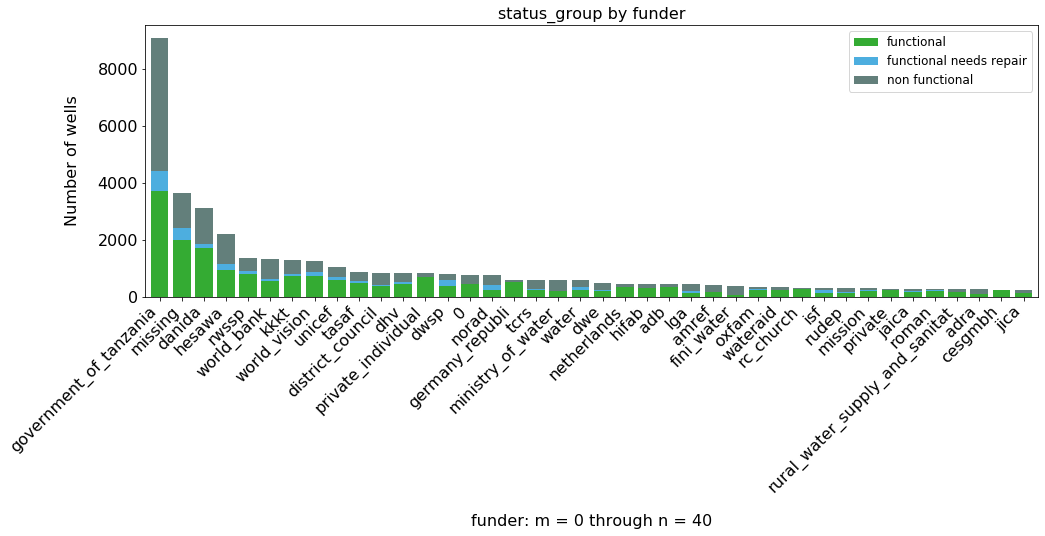

In [1020]:
top_n_funders = dataset_eda_subset(df_train, col1='funder', col2='status_group', 
                                   rotation = 45, m=0, n=40, figsize=(16,5), fontsize=16)
top_n_funders.head(10)

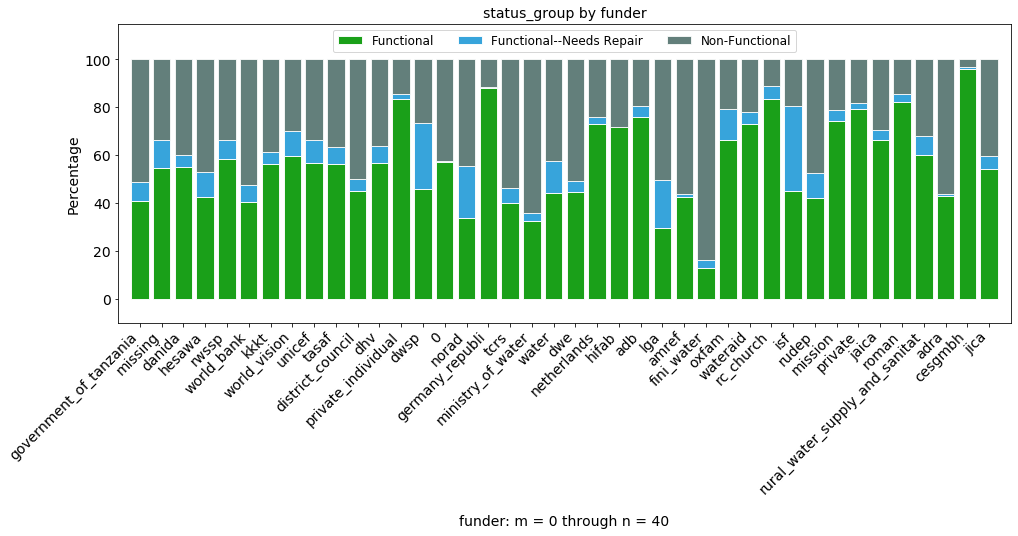

In [1019]:
top_n_funders_pct = dataset_eda_subset_pct(df_train, col1='funder', col2='status_group', 
                                           m=0, n=40, figsize=(16, 5.5), legend_cols=3)

### Installers

status_group      functional  functional needs repair  non functional
installer                                                            
dwe                     9450                 1622                6354
missing                 2000                  440                1215
government               552                  258                1081
hesawa                   786                   54                 555
rwe                      304                  137                 765
commu                    726                   32                 307
danida                   542                   83                 425
district_council         385                   61                 515
kkkt                     425                   62                 423
0                        445                    3                 329

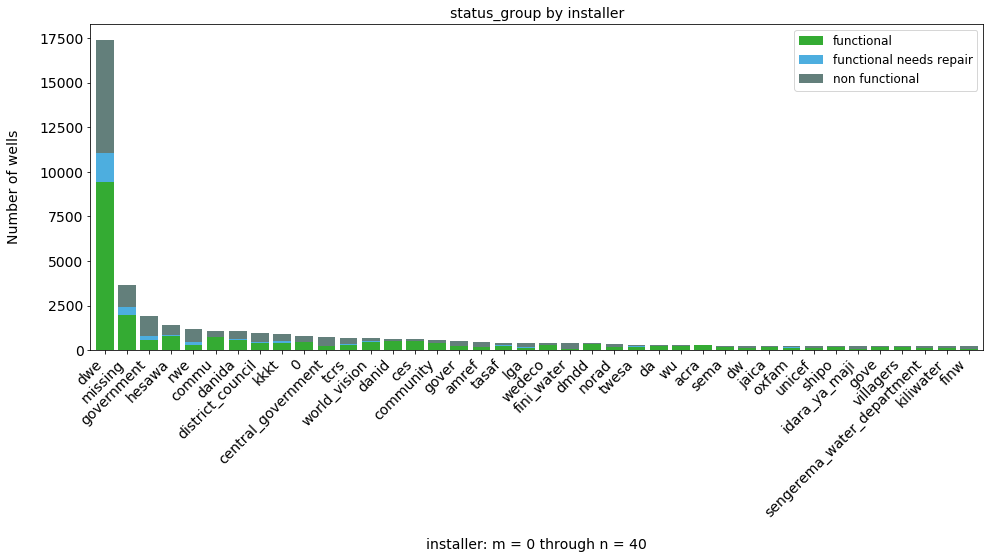

In [1069]:
top_n_installers = dataset_eda_subset(df_train, col1='installer', figsize=(16,6),
                                      col2='status_group', m=0, n=40)
top_n_installers.head(10)

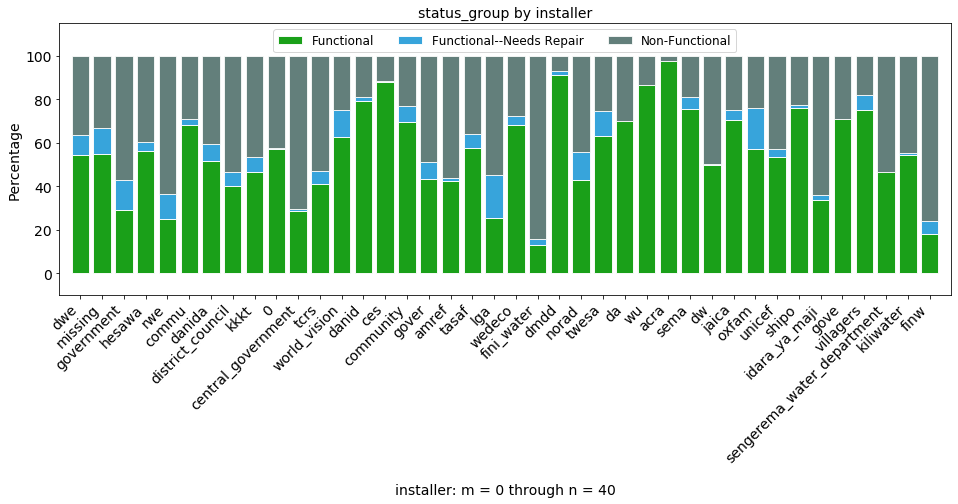

In [53]:
top_n_installers_pct = dataset_eda_subset_pct(df_train, col1='installer', col2='status_group', 
                                           figsize=(16, 5), m=0, n=40, fontsize=14)

### Payment type

status_group  functional  functional needs repair  non functional
payment_type                                                     
never pay          11379                     1907           12062
per bucket          6090                      409            2486
monthly             5482                      927            1891
unknown             3528                      432            4197
on failure          2429                      277            1208
annually            2740                      247             655
other                611                      118             325

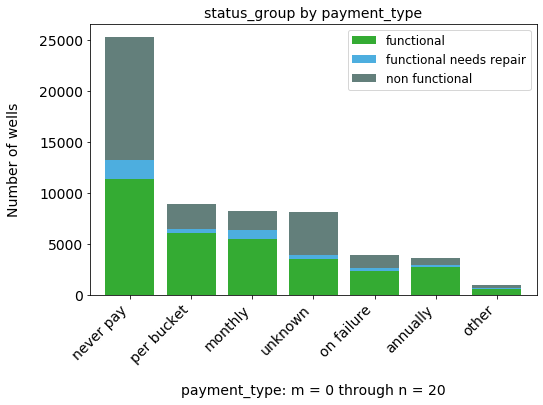

In [55]:
status_by_payment_type = dataset_eda_subset(df_train, col1='payment_type', figsize=(8,5),
                                            col2='status_group', n=20, rotation=45, fontsize=14)
status_by_payment_type

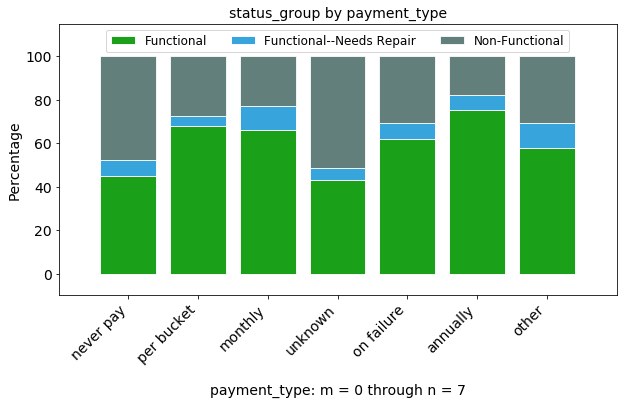

In [56]:
payment_type_pct = dataset_eda_subset_pct(df_train, col1='payment_type', col2='status_group', 
                                           figsize=(10, 5), m=0, n=7)

### Region

status_group   functional  functional needs repair  non functional
region                                                            
Iringa               4141                  123                1030
Shinyanga            2789                  635                1558
Mbeya                2319                  504                1816
Kilimanjaro          2640                  322                1417
Morogoro             2119                  300                1587
Arusha               2294                  175                 881
Kagera               1727                  304                1285
Mwanza               1502                  183                1417
Kigoma               1363                  603                 850
Ruvuma               1480                  164                 996
Pwani                1556                   36                1043
Tanga                1436                   73                1038
Dodoma               1009                  209                 983
Singida              1011                  128                 954
Mara                  886                   60                1023
Tabora                848                   45                1066
Rukwa                 707                  135                 966
Mtwara                524                  126                1080
Manyara               987                   96                 500
Lindi                 460                   93                 993
Dar es Salaam         461                    3                 341

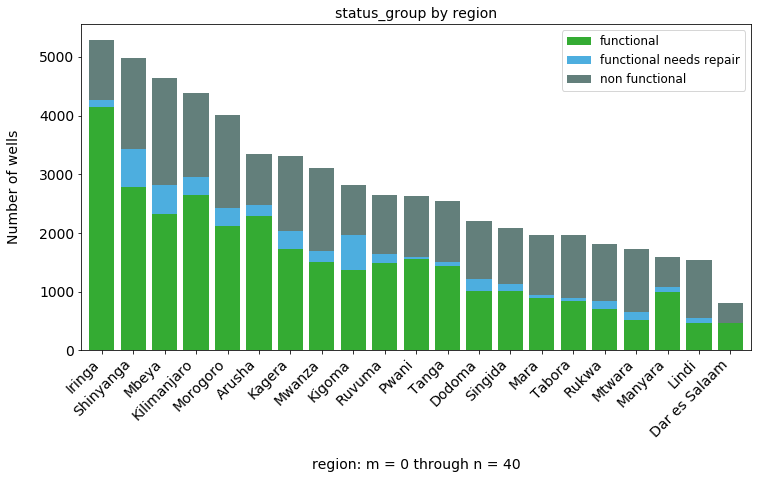

In [1076]:
status_by_region = dataset_eda_subset(df_train, col1='region', col2='status_group', n=40)
status_by_region

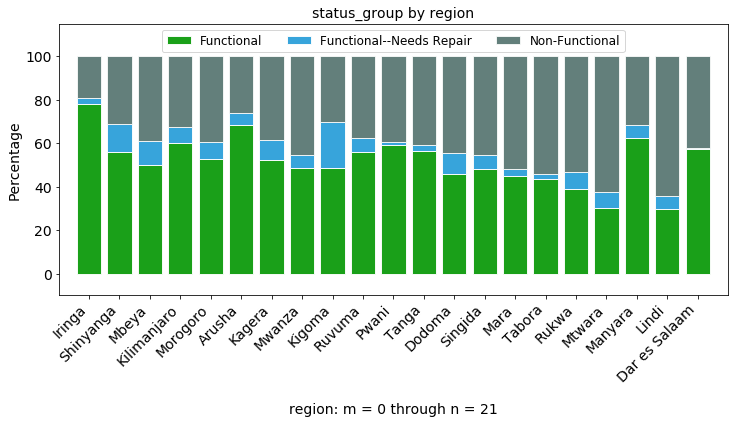

In [67]:
region_pct = dataset_eda_subset_pct(df_train, col1='region', col2='status_group', 
                                           figsize=(12, 5), m=0, n=21)

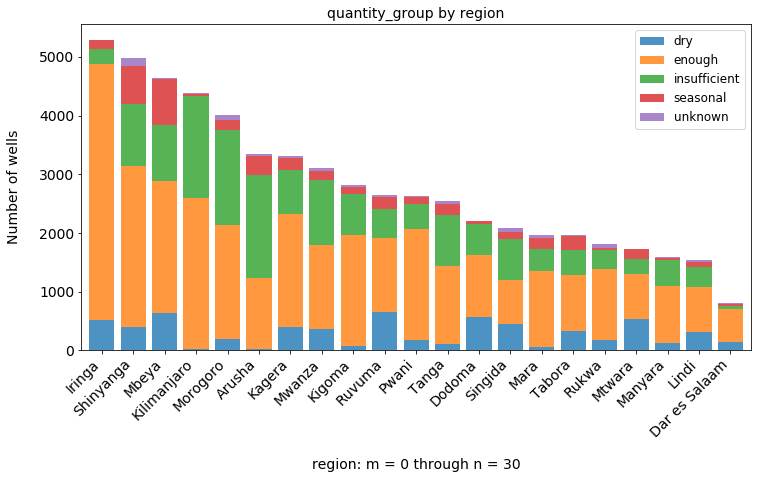

In [68]:
qty_region = dataset_eda_subset(df_train, col1='region', col2='quantity_group', m=0, n=30, 
                                legend=True, colors=None)


### LGA

status_group  functional  functional needs repair  non functional
lga                                                              
Njombe              2007                   94                 402
Arusha Rural         875                   48                 329
Moshi Rural          733                  119                 399
Bariadi              580                  409                 188
Rungwe               676                  161                 269
Kilosa               587                   73                 434
Kasulu               611                  201                 235
Mbozi                450                   70                 514
Meru                 657                   32                 320
Bagamoyo             730                    2                 265

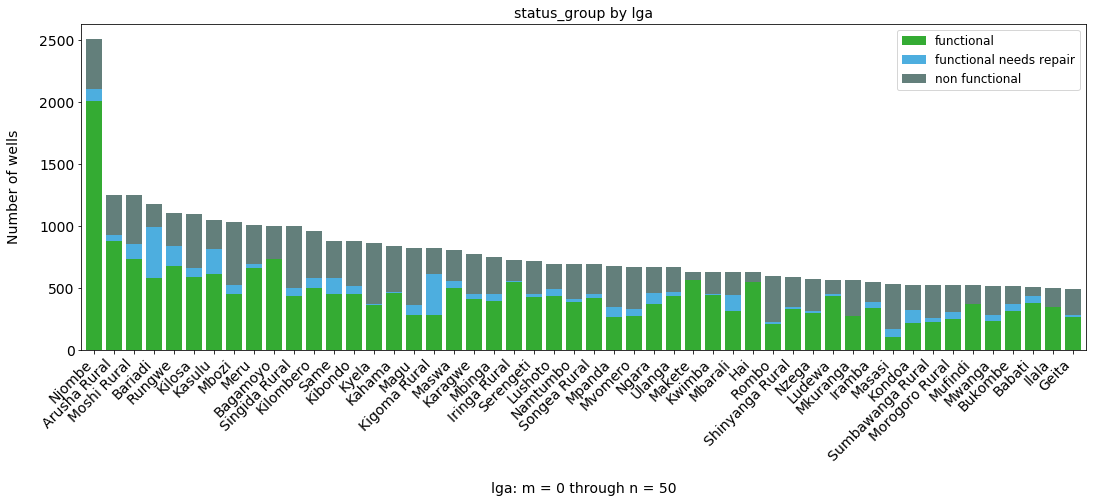

In [1405]:
status_by_lga = dataset_eda_subset(df_train, col1='lga', col2='status_group', 
                                   figsize=(18, 6), m=0, n=50)
status_by_lga.head(10)

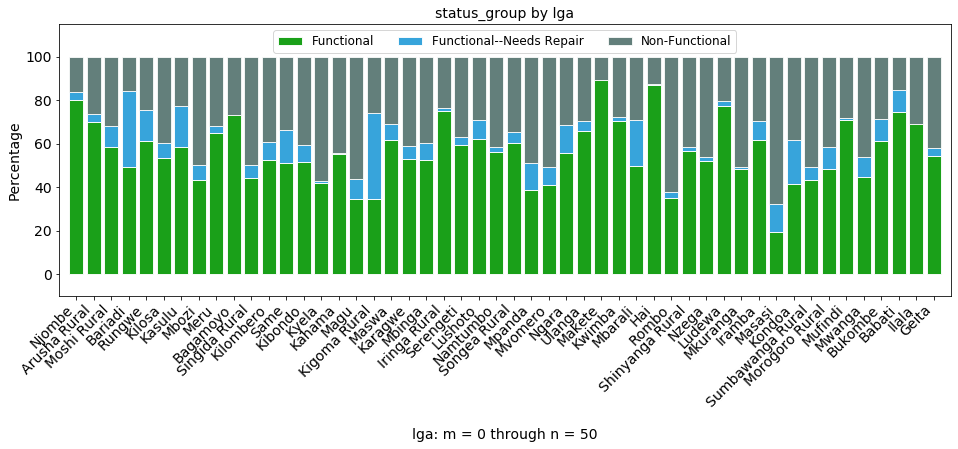

In [1404]:
status_lga_pct = dataset_eda_subset_pct(df_train, col1='lga', col2='status_group', figsize=(16, 5), m=0, n=50)

### Extraction type class

status_group           functional  functional needs repair  non functional
extraction_type_class                                                     
gravity                     16048                     2701            8031
handpump                    10375                      995            5086
other                        1029                      206            5195
submersible                  3329                      253            2597
motorpump                    1135                      138            1714
rope pump                     293                       17             141
wind-powered                   50                        7              60

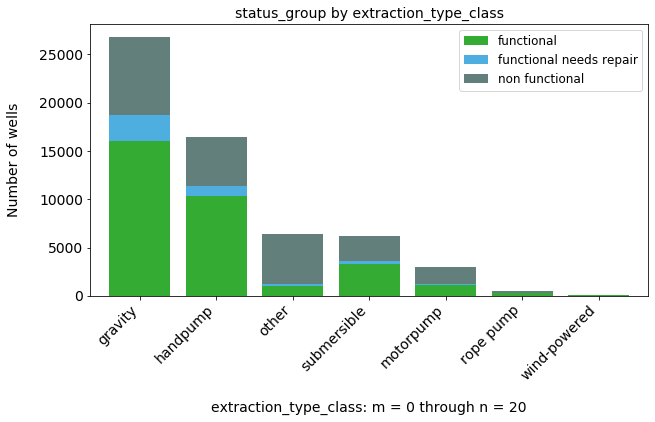

In [112]:
status_by_extraction_type_class = dataset_eda_subset(df_train, col1='extraction_type_class', 
                                                     figsize=(10, 5), col2='status_group', n=20)
status_by_extraction_type_class

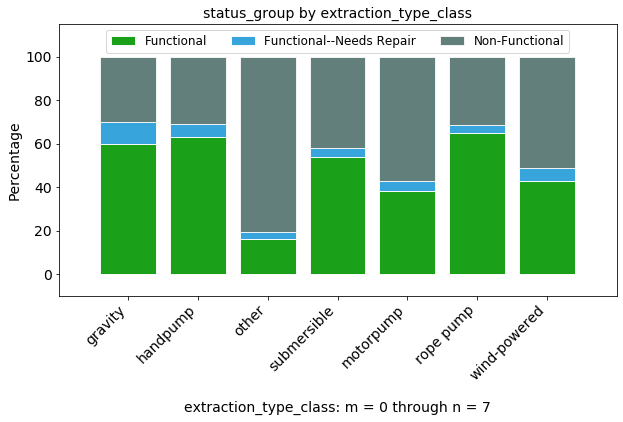

In [113]:
status_extr_type_class_pct = dataset_eda_subset_pct(df_train, col1='extraction_type_class', col2='status_group', 
                                                figsize=(10, 5), m=0, n=7)

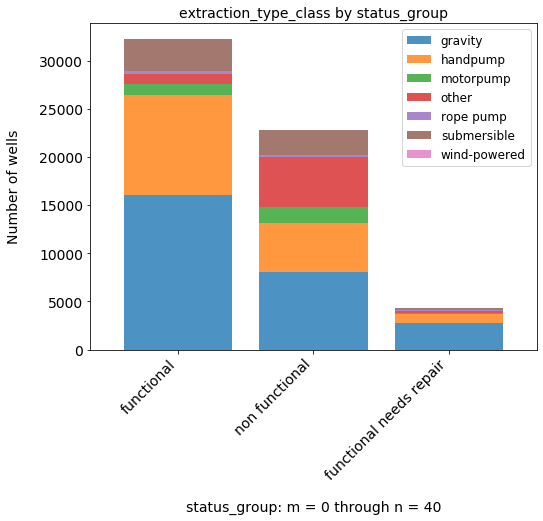

In [114]:
extr_class_status = dataset_eda_subset(df_train, col1='status_group',
                                       col2='extraction_type_class', 
                                       m=0, n=40, figsize=(8, 6), 
                                       legend=True, colors=None, 
                                       rotation=45, fontsize=14)

### Quantity

status_group  functional  functional needs repair  non functional
quantity                                                         
enough             21648                     2400            9138
insufficient        7916                     1450            5763
dry                  157                       37            6052
seasonal            2325                      416            1309
unknown              213                       14             562

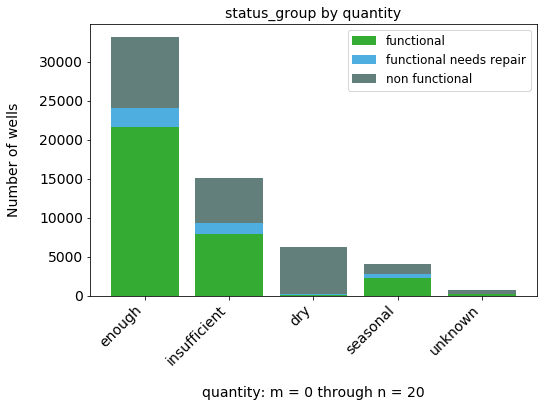

In [119]:
status_by_quantity = dataset_eda_subset(df_train, col1='quantity', figsize=(8, 5), 
                                        col2='status_group', n=20)
status_by_quantity

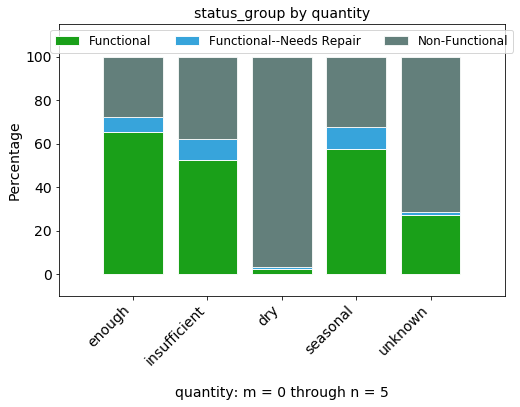

In [120]:
status_quantity_pct = dataset_eda_subset_pct(df_train, col1='quantity', col2='status_group', 
                                                figsize=(8, 5), m=0, n=5)

### Source

status_group          functional  functional needs repair  non functional
source                                                                   
spring                     10592                     1276            5153
shallow well                8324                      957            7543
machine dbh                 5422                      491            5162
river                       5465                     1221            2926
rainwater harvesting        1386                      314             595
hand dtw                     497                       17             360
lake                         162                       12             591
dam                          253                       24             379
other                        126                        1              85
unknown                       32                        4              30

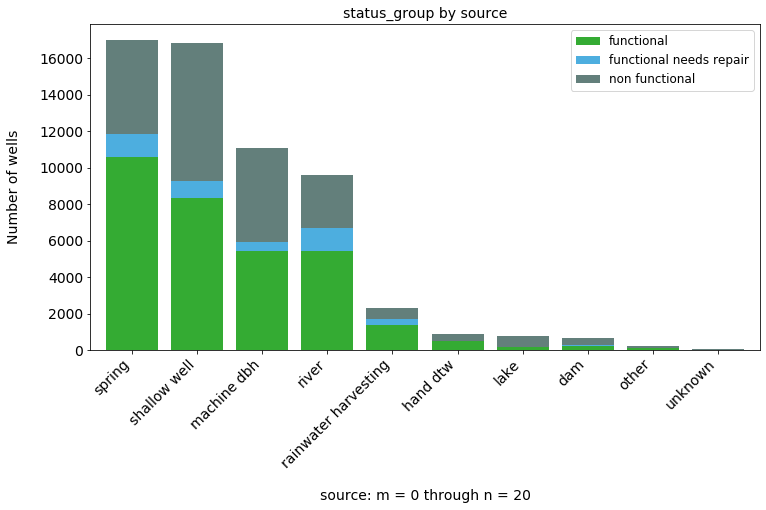

In [123]:
status_by_source = dataset_eda_subset(df_train, col1='source', col2='status_group', n=20)
status_by_source

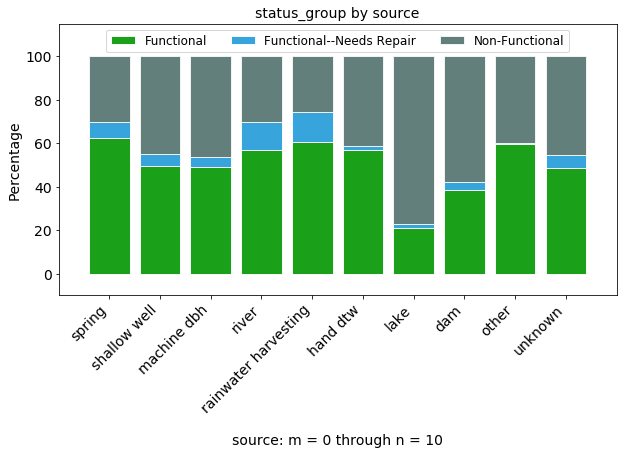

In [124]:
status_source_pct = dataset_eda_subset_pct(df_train, col1='source', col2='status_group', 
                                            figsize=(10, 5), m=0, n=10)

### Waterpoint type

status_group                 functional  functional needs repair  \
waterpoint_type                                                    
communal standpipe                17726                     2260   
hand pump                         10805                     1029   
other                               840                      293   
communal standpipe multiple        2235                      648   
improved spring                     563                       85   
cattle trough                        84                        2   
dam                                   6                        0   

status_group                 non functional  
waterpoint_type                              
communal standpipe                     8536  
hand pump                              5654  
other                                  5247  
communal standpipe multiple            3220  
improved spring                         136  
cattle trough                            30  
dam                                       1

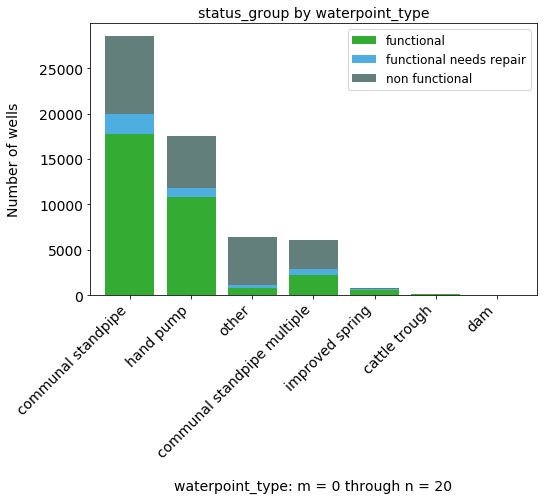

In [129]:
status_by_waterpoint_type = dataset_eda_subset(df_train, col1='waterpoint_type', figsize=(8, 5),
                                               col2='status_group', m=0, n=20)
status_by_waterpoint_type

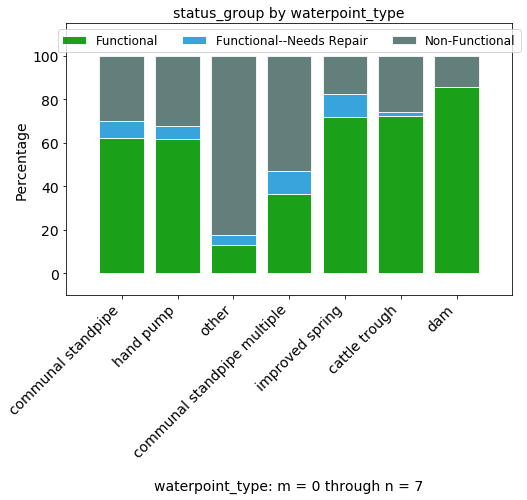

In [130]:
status_waterpt_type_pct = dataset_eda_subset_pct(df_train, col1='waterpoint_type', col2='status_group', 
                                                figsize=(8, 5), m=0, n=7)

### Management

status_group      functional  functional needs repair  non functional
management                                                           
wug                     3906                      645            1964
water_board             2170                      265             498
wua                     1751                      205             579
private_operator        1476                       44             451
parastatal              1020                      211             537
water_authority          446                       52             406
other                    505                       55             284
company                  267                       15             403
unknown                  224                       27             310
other__school             23                        1              75
trust                     46                        6              26

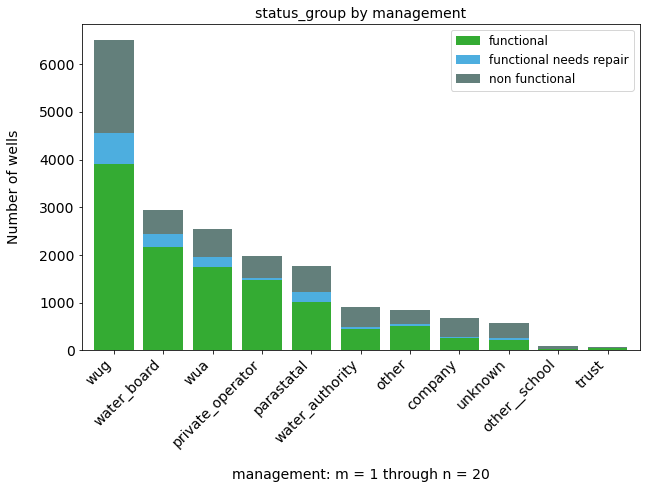

In [54]:
status_by_management = dataset_eda_subset(df_train, col1='management', 
                                          col2='status_group', 
                                          figsize=(10,6), m=1, n=20)
status_by_management

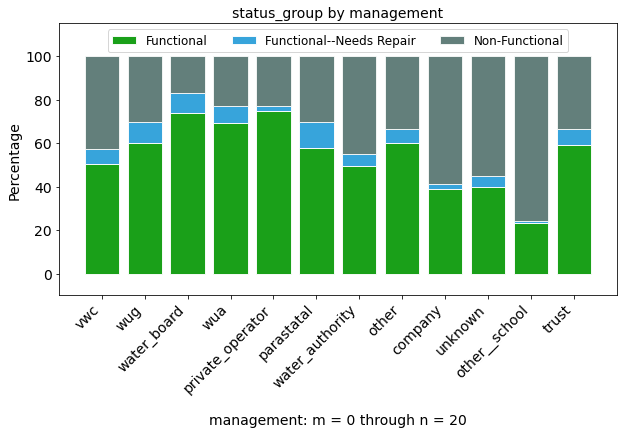

In [55]:
mgmt_pct = dataset_eda_subset_pct(df_train, col1='management', col2='status_group', 
                                           figsize=(10, 5), m=0, n=20)

### Public Meeting

status_group    functional  functional needs repair  non functional
public_meeting                                                     
True                 28408                     3719           18884
False                 2173                      442            2440

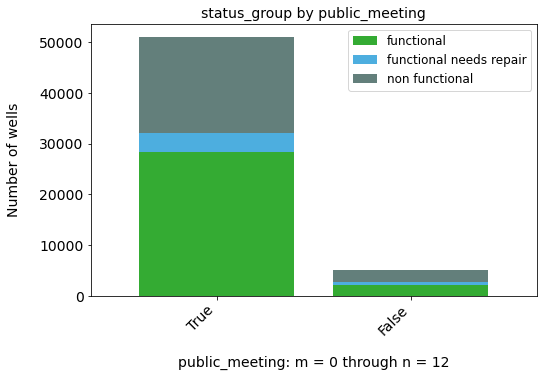

In [92]:
status_by_public_meeting = dataset_eda_subset(df_train, col1='public_meeting', col2='status_group', 
                                              figsize=(8, 5), n=12)
status_by_public_meeting


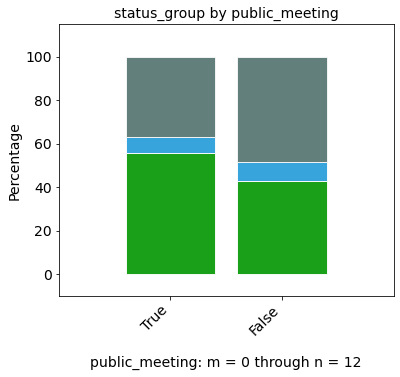

In [93]:
status_public_mtg_pct = dataset_eda_subset_pct(df_train, col1='public_meeting', col2='status_group', 
                                                figsize=(6, 5), m=0, n=12, legend=False)

### Permit

status_group  functional  functional needs repair  non functional
permit                                                           
True               21541                     2697           14614
False               9045                     1320            7127

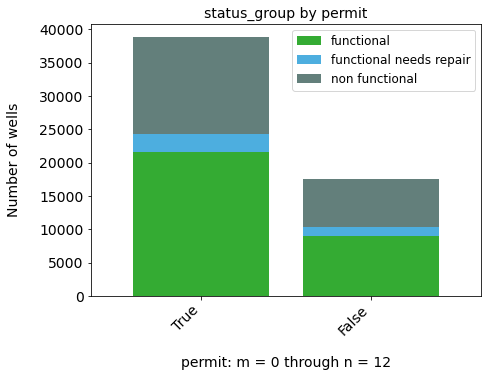

In [94]:
status_by_permit = dataset_eda_subset(df_train, col1='permit', col2='status_group', figsize=(7,5), n=12)
status_by_permit

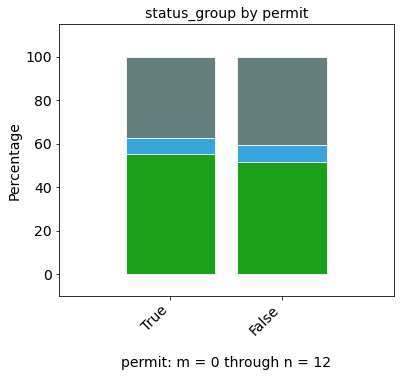

In [95]:
status_permit_pct = dataset_eda_subset_pct(df_train, col1='permit', col2='status_group', 
                                                figsize=(6, 5), m=0, n=12, legend=False)

# Modeling:  Baseline Comparison

Before running supervised machine learning models, let's look at what we could expect from the most rudimentary approaches to determining whether a well is functional or not:  random guessing, and the Zero Rule.

## Random Guess

Performance from randomly guessing informed by the overall percentage of wells that are functional, non-functional, or functional but in need of repair would be as follows:

Percent correct = (%functional * %guess functional) + (%non-functional * %guess non-functional) + (%functional, needs repair * %guess functional, needs repair)

In this dataset, this works out to (.543 * .543) + (.384 * .384) + (.0727 * 0.727) = 44%

## Zero Rule

The Zero Rule states that the simple heuristic of always guessing the dominant class (the mode in statistical parlance) for any unknown target will give you a better result than will random guessing (guessing whether a particular well, in this case, is functional, non-functional, or functional but in need of repair in proportion to the overall proportion of each of these classes).  

In this case, the Zero Rule says that if we guess the dominant class ('functional') for each well, we will have an accuracy of 54.3%.  

Since 54.3% is greater than 44%, we would select the Zero Rule result of 54.3% as our baseline accuracy.  We should be able to signficantly improve upon this with skillful modeling. 

Below I will utilize several ML modeling techniques, including decision trees and GridSearchCV for hyperparameter tuning, bagging trees, random forests and hyperparameter tuning, gradient boosting and Adaboost, XGBoost with parameter tuning, and finally support vector machines.

# Modeling: Preparing dataframe

## Columns to use for modeling


I propose using the following columns for modeling:

1. funder OR installer (use only one of these to avoid multi-collinearity)
2. management
3. basin, district_code, region, lga, ward, OR subvillage (use only one to avoid multi-collinearity)
4. payment OR payment_type (choosing payment)
5. scheme_name OR scheme_management (choosing scheme_name for greater specificity and to avoid possible collinearity issues between 'scheme_management' and 'management')
6. water_quality OR quality_group (choosing water_quality) 
7. quantity_group OR quantity (choosing quantity_group)  
8. source, source_type, OR source_class (choosing source, as it is a bit more specific)
9. extraction_type_group, extraction_type, OR extraction_type_class (choosing extraction_type_class)
10. waterpoint_type OR waterpoint_type_group (choosing waterpoint_type)

I've decided to drop columns for the following reasons:
* Data integrity problems, such as missing or unclear entries (e.g., 'amount_tsh', 'construction_year', 'population')
* The data doesn't add anything (e.g., 'date_recorded', 'num_private', 'recorded_by')
* Potential collinearity problems (e.g., choosing 'region_code' over 'district_code' or 'source' over 'source_type')
* I'm not able to utilize it at this time (e.g., 'gps_height', 'longitude', 'latitude', 'public_meeting', 'permit')


## Grouping values below top 'n' in select categories into 'other'

Certain features in this dataframe, such as 'funder' and 'installer', have over 2000 unique values per feature; others, such as 'subvillage', have over 20,000  Creating dummy variables for just one of these features could result in anywhere between 2000 and 20,000 columns!  Since all of the features that I will be using are categorical (and thus will require conversion into dummy variables), the sheer number of dummy variables could exceed 10,000 and result in a dataset that is exceedingly time-consuming to run in models.  

To address this issue, I created a function to select a subset of values and then put the remaining project records into an 'other' category.  For example, I can select the top 50 funders by how many projects they have funded, and place all of the remaining funders' records into an 'other' category.  That would result in 51 dummy variables for 'funder' -- far more manageable than 2000!   The cutoff value for 'n' can be based on an evaluation of the outcomes as one goes further down the list of funders and viewing their results.  For example, if the percentages of functional, non-functional, and 'needs repair' are pretty similar for the remaining funders, or if the number of projects for each funder becomes very small, then it's unlikely that creating separate dummy variables for each of these smaller funders (or installers, or whatever) will produce better outcomes when modeling.  

Preprocessing the data to allow for 'n' plus 'other' (n + 1) requires renaming those records for which the variable value is not on the top-n list to 'other'.  To retain the information in the original records, the function creates a duplicate column for the feature in question and then performs the following actions:   

1. Creates a list of all of the values for that variable, sorted by number of projects from greatest to least 
2. Creates a 'top-n' list with the top 'n' values and a 'not-top-n' list of all the other variable values
3. Replaces the name of the datapoint with 'other' if the name is on the 'not-top-n' list 
4. Returns dataframe with new 'other' values for those not on the 'top-n' list


# Modeling:  Decision trees

## Decision tree modeling results (before hyperparameter tuning)

### FUNDER (n=125); REGION, management, payment, water_quality, quantity_group, waterpoint_type, source, extraction_type_class, permit, public_meeting, max_depth=20

In [172]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [173]:
features = ['funder', 'management', 'region', 'payment', 'water_quality', 
            'quantity_group', 'source', 'extraction_type_class', 'status_group',
           'waterpoint_type', 'public_meeting', 'permit']

features_top_n = ['funder']

all_model_features = ['funder_duplicate', 'management', 'region', 'public_meeting', 'permit',
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


Accuracy score:  76.47811447811448
Mean Training Score: 80.84%
Mean Test Score: 76.48%
Jaccard score:  [0.69192015 0.20867614 0.5857231 ]
Individual feature importances--showing top 10:


Importance
waterpoint_type_other                          0.111437
quantity_group_seasonal                        0.087162
quantity_group_enough                          0.062081
quantity_group_insufficient                    0.050768
permit_True                                    0.034174
source_spring                                  0.024686
management_vwc                                 0.023816
waterpoint_type_communal standpipe multiple    0.021151
payment_pay per bucket                         0.020404
region_Iringa                                  0.019907


Roll-up summary feature importance table, all features:


Importance
var_abbr            
quantit     0.208688
waterpo     0.149923
region_     0.146657
funder_     0.145671
payment     0.081613
source_     0.075193
managem     0.064003
extract     0.048248
permit_     0.034174
water_q     0.028139
public_     0.017692

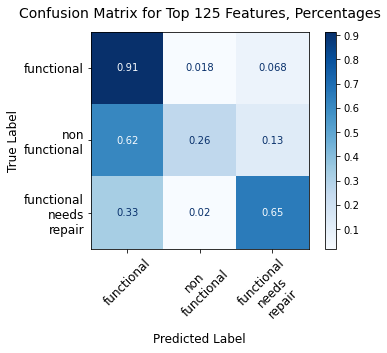

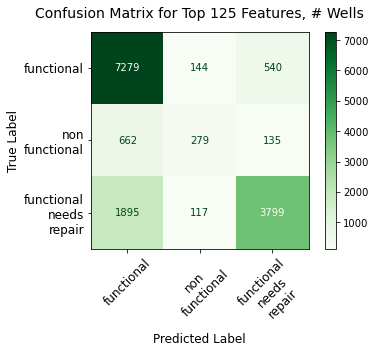

In [174]:
df_n, X_train, clf, accuracy, jaccard, \
clf_feat_imps, clf_params, \
imp_table, summ_imp_table = top_n_features_dt_model(df, features, features_top_n, all_model_features, n=125, p=126, 
                                                    criterion='entropy', max_depth=20, col_title_length = 7, 
                                                    random_state=123)



### FUNDER, region, multiple 'n' values (same model as above, but multiple 'n' values)

In [175]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [176]:
features = ['funder', 'management', 'region', 'payment', 'water_quality', 'permit', 'public_meeting', 
            'quantity_group', 'source', 'extraction_type_class', 'status_group',
           'waterpoint_type']

features_top_n = ['funder']

all_model_features = ['funder_duplicate', 'management', 'region', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


Accuracy score, Jaccard score, and confusion matrix for n = 50:
Accuracy score:  76.1952861952862
Mean Training Score: 80.74%
Mean Test Score: 76.20%
Jaccard score:  [0.68816692 0.20264317 0.58464838]
Individual feature importances--showing top 10:


Importance
waterpoint_type_other                          0.111086
quantity_group_seasonal                        0.086911
quantity_group_enough                          0.061936
quantity_group_insufficient                    0.051103
permit_True                                    0.034714
source_spring                                  0.025519
management_vwc                                 0.024150
waterpoint_type_communal standpipe multiple    0.020878
payment_unknown                                0.020769
funder_duplicate_other                         0.020510


Roll-up summary feature importance table, all features:


Importance
var_abbr            
quantit     0.208769
region_     0.153724
waterpo     0.149200
funder_     0.126225
payment     0.085303
source_     0.077348
managem     0.066712
extract     0.049244
permit_     0.034714
water_q     0.029064
public_     0.019695



Accuracy score, Jaccard score, and confusion matrix for n = 100:
Accuracy score:  76.51178451178451
Mean Training Score: 80.85%
Mean Test Score: 76.51%
Jaccard score:  [0.69260812 0.20518519 0.58767334]
Individual feature importances--showing top 10:


Importance
waterpoint_type_other                          0.111543
quantity_group_seasonal                        0.087233
quantity_group_enough                          0.062395
quantity_group_insufficient                    0.050773
permit_True                                    0.032396
source_spring                                  0.024203
management_vwc                                 0.023592
waterpoint_type_communal standpipe multiple    0.021528
region_Iringa                                  0.019929
extraction_type_class_submersible              0.019721


Roll-up summary feature importance table, all features:


Importance
var_abbr            
quantit     0.209085
waterpo     0.150932
region_     0.150696
funder_     0.140043
payment     0.079990
source_     0.076879
managem     0.064003
extract     0.047995
permit_     0.032396
water_q     0.029799
public_     0.018183



Accuracy score, Jaccard score, and confusion matrix for n = 125:
Accuracy score:  76.47138047138047
Mean Training Score: 80.85%
Mean Test Score: 76.47%
Jaccard score:  [0.69163498 0.20911128 0.58596762]
Individual feature importances--showing top 10:


Importance
waterpoint_type_other                          0.111336
quantity_group_seasonal                        0.087247
quantity_group_enough                          0.062080
quantity_group_insufficient                    0.050528
permit_True                                    0.033464
source_spring                                  0.024736
management_vwc                                 0.023018
waterpoint_type_communal standpipe multiple    0.021598
extraction_type_class_submersible              0.020724
region_Iringa                                  0.019975


Roll-up summary feature importance table, all features:


Importance
var_abbr            
quantit     0.208523
waterpo     0.149925
region_     0.148063
funder_     0.144578
payment     0.078940
source_     0.076675
managem     0.063930
extract     0.048373
permit_     0.033464
water_q     0.029177
public_     0.018353



Accuracy score, Jaccard score, and confusion matrix for n = 250:
Accuracy score:  76.60606060606061
Mean Training Score: 81.09%
Mean Test Score: 76.61%
Jaccard score:  [0.6928968  0.20802377 0.59063074]
Individual feature importances--showing top 10:


Importance
waterpoint_type_other                          0.111606
quantity_group_seasonal                        0.087352
quantity_group_enough                          0.062380
quantity_group_insufficient                    0.051064
permit_True                                    0.030394
management_vwc                                 0.024470
source_spring                                  0.023453
waterpoint_type_communal standpipe multiple    0.021066
payment_pay per bucket                         0.020221
region_Iringa                                  0.019419


Roll-up summary feature importance table, all features:


Importance
var_abbr            
quantit     0.209630
funder_     0.162961
waterpo     0.150031
region_     0.143755
payment     0.079306
source_     0.072283
managem     0.060923
extract     0.044695
permit_     0.030394
water_q     0.028604
public_     0.017420



Accuracy score, Jaccard score, and confusion matrix for n = 500:
Accuracy score:  76.7003367003367
Mean Training Score: 81.07%
Mean Test Score: 76.70%
Jaccard score:  [0.69273476 0.20182094 0.59388846]
Individual feature importances--showing top 10:


Importance
waterpoint_type_other                          0.111531
quantity_group_seasonal                        0.087341
quantity_group_enough                          0.061908
quantity_group_insufficient                    0.051277
permit_True                                    0.029462
management_vwc                                 0.023556
source_spring                                  0.023065
waterpoint_type_communal standpipe multiple    0.019907
region_Iringa                                  0.019324
payment_pay per bucket                         0.018907


Roll-up summary feature importance table, all features:


Importance
var_abbr            
quantit     0.209250
funder_     0.174500
waterpo     0.148642
region_     0.141524
payment     0.077334
source_     0.071103
managem     0.060982
extract     0.043479
permit_     0.029462
water_q     0.027444
public_     0.016280

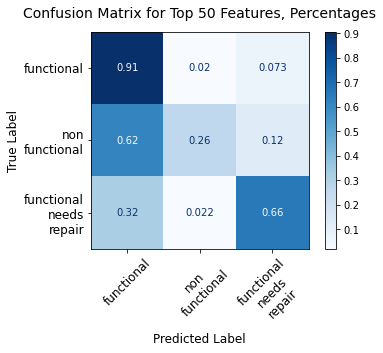

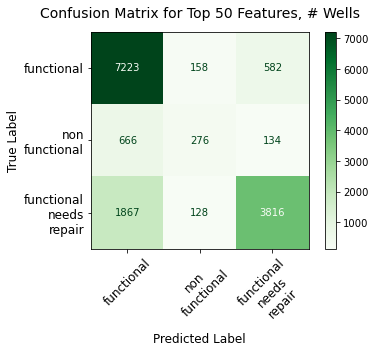

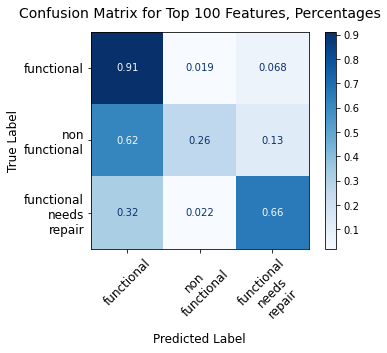

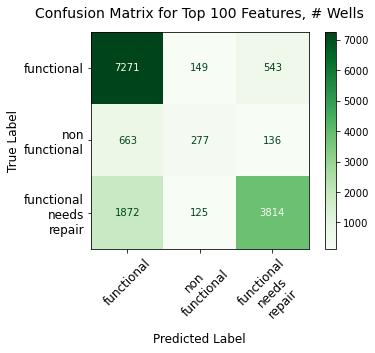

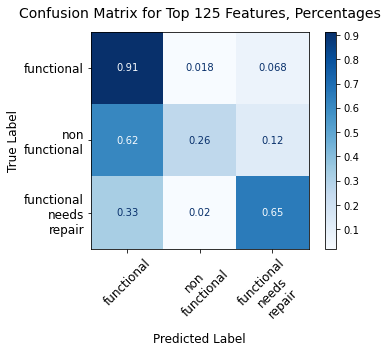

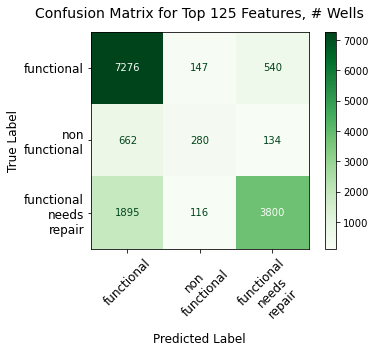

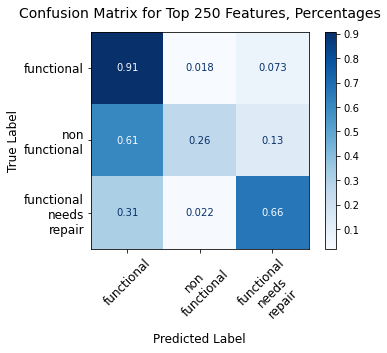

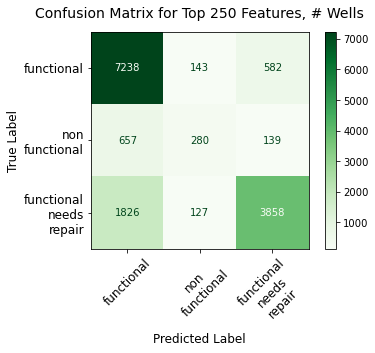

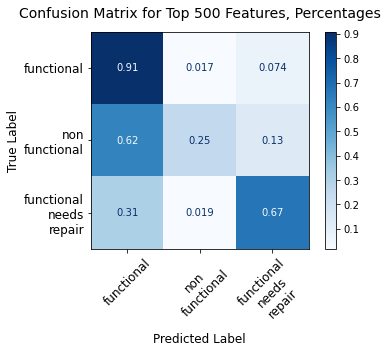

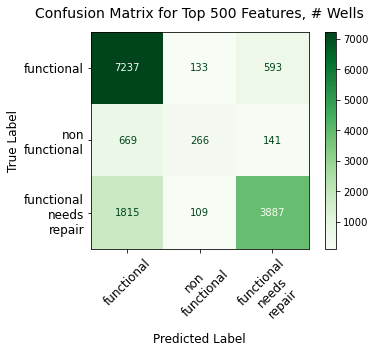

In [177]:
df_ns, X_train_vals_1, clfs_1, \
acc_scores_1, jaccard_scores_1, \
feat_importances_1, parameters_1, \
imp_tables_1, summ_imp_table_1  = top_n_multiple_dt_model(df, features, features_top_n, all_model_features, 
                                                          n_range = [50, 100, 125, 250, 500], criterion='entropy', 
                                                          col_title_length=7, max_depth=20)


In [178]:
acc_scores_1    # n = [50, 100, 125, 250, 500]

[76.1952861952862,
 76.51178451178451,
 76.47138047138047,
 76.60606060606061,
 76.7003367003367]

### FUNDER, LGA, multiple 'n' values

In [181]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [182]:
features = ['funder', 'management', 'lga', 'payment', 'water_quality', 
            'quantity_group', 'source', 'extraction_type_class', 'status_group',
           'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'management', 'lga_duplicate', 'permit', 'public_meeting',
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


Accuracy score, Jaccard score, and confusion matrix for n = 50:

Accuracy score:  76.01346801346801
Mean Training Score: 79.81%
Mean Test Score: 76.01%
Jaccard score:  [0.68834459 0.19112114 0.57554069]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.120131
quantity_group_seasonal                        0.093963
quantity_group_enough                          0.066843
quantity_group_insufficient                    0.054116
waterpoint_type_communal standpipe multiple    0.023936
extraction_type_class_submersible              0.021236
payment_pay per bucket                         0.020613
lga_duplicate_Bariadi                          0.020504
permit_True                                    0.020072
funder_duplicate_government_of_tanzania        0.019476


Roll-up summary feature importance table, all features


Importance
var_abbr            
quantit     0.224968
lga_dup     0.188334
waterpo     0.164545
funder_     0.116737
payment     0.070129
source_     0.065558
extract     0.056319
managem     0.053821
water_q     0.022624
permit_     0.020072
public_     0.016892


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.224968
lga_dup     0.178932
waterpo     0.164545
funder_     0.096911
payment     0.070129
source_     0.064237
extract     0.055616
managem     0.051305
permit_     0.020072
water_q     0.019116
public_     0.016892


The top 100 dummy variables contribute Importance    0.962723
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 100:

Accuracy score:  76.23569023569023
Mean Training Score: 79.61%
Mean Test Score: 76.24%
Jaccard score:  [0.69063058 0.2004662  0.57572469]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.124043
quantity_group_seasonal                        0.096931
quantity_group_enough                          0.068223
quantity_group_insufficient                    0.055914
waterpoint_type_communal standpipe multiple    0.024281
lga_duplicate_Bariadi                          0.021026
payment_pay per bucket                         0.020831
funder_duplicate_government_of_tanzania        0.019246
extraction_type_class_submersible              0.019133
source_spring                                  0.018473


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.240245
quantit     0.231273
waterpo     0.169333
funder_     0.102980
payment     0.066089
source_     0.056821
extract     0.048442
managem     0.042083
water_q     0.017696
public_     0.012982
permit_     0.012056


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.231273
lga_dup     0.191133
waterpo     0.169333
funder_     0.077398
payment     0.066089
source_     0.056096
extract     0.046657
managem     0.038274
water_q     0.013572
public_     0.012982
permit_     0.012056


The top 100 dummy variables contribute Importance    0.914864
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 125:

Accuracy score:  76.22895622895622
Mean Training Score: 79.58%
Mean Test Score: 76.23%
Jaccard score:  [0.68970381 0.20062451 0.57673267]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.124348
quantity_group_seasonal                        0.096786
quantity_group_enough                          0.067913
quantity_group_insufficient                    0.056126
waterpoint_type_communal standpipe multiple    0.023674
lga_duplicate_Bariadi                          0.021095
payment_pay per bucket                         0.020288
funder_duplicate_government_of_tanzania        0.019567
extraction_type_class_submersible              0.018852
source_spring                                  0.018072


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.246554
quantit     0.231027
waterpo     0.168678
funder_     0.102175
payment     0.062603
source_     0.058762
extract     0.047465
managem     0.041150
water_q     0.017057
public_     0.013267
permit_     0.011260


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.231027
lga_dup     0.192420
waterpo     0.168678
funder_     0.073910
payment     0.062603
source_     0.056316
extract     0.046488
managem     0.037201
water_q     0.014750
public_     0.013267
permit_     0.011260


The top 100 dummy variables contribute Importance    0.907922
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 250:

Accuracy score:  76.32323232323233
Mean Training Score: 79.74%
Mean Test Score: 76.32%
Jaccard score:  [0.6909211  0.20544747 0.57810332]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.123565
quantity_group_seasonal                        0.096097
quantity_group_enough                          0.067592
quantity_group_insufficient                    0.055591
waterpoint_type_communal standpipe multiple    0.023419
lga_duplicate_Bariadi                          0.020844
payment_pay per bucket                         0.019767
funder_duplicate_government_of_tanzania        0.018620
extraction_type_class_submersible              0.018441
payment_pay monthly                            0.017372


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.239410
quantit     0.229417
waterpo     0.167789
funder_     0.115997
payment     0.062723
source_     0.055901
extract     0.046158
managem     0.042135
water_q     0.016476
public_     0.013021
permit_     0.010973


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.229417
lga_dup     0.188430
waterpo     0.167789
funder_     0.072461
payment     0.062723
source_     0.053663
extract     0.044934
managem     0.037719
public_     0.013021
water_q     0.012820
permit_     0.010973


The top 100 dummy variables contribute Importance    0.893949
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 500:

Accuracy score:  76.41750841750842
Mean Training Score: 79.71%
Mean Test Score: 76.42%
Jaccard score:  [0.69210502 0.20480993 0.57939714]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.123788
quantity_group_seasonal                        0.096339
quantity_group_enough                          0.068182
quantity_group_insufficient                    0.055267
waterpoint_type_communal standpipe multiple    0.023634
lga_duplicate_Bariadi                          0.020880
payment_pay per bucket                         0.019987
funder_duplicate_government_of_tanzania        0.018424
source_spring                                  0.018011
extraction_type_class_submersible              0.017982


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.235530
quantit     0.230149
waterpo     0.168546
funder_     0.120846
payment     0.062347
source_     0.055121
extract     0.046716
managem     0.040468
water_q     0.016512
public_     0.012841
permit_     0.010924


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.230149
lga_dup     0.186567
waterpo     0.168546
funder_     0.064046
payment     0.062347
source_     0.054369
extract     0.045160
managem     0.037136
water_q     0.014276
public_     0.012841
permit_     0.010924


The top 100 dummy variables contribute Importance    0.886361
dtype: float64



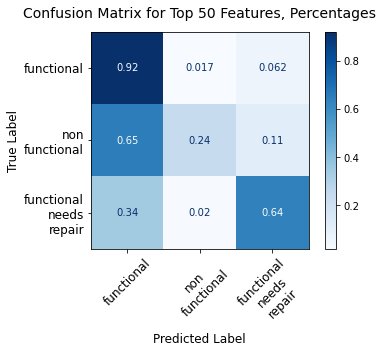

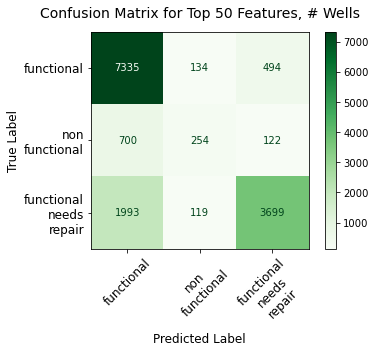

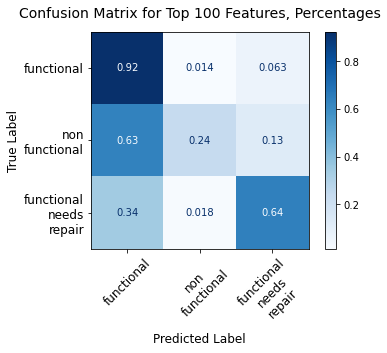

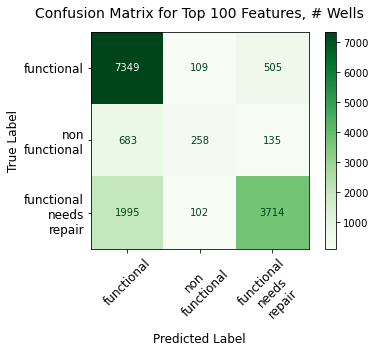

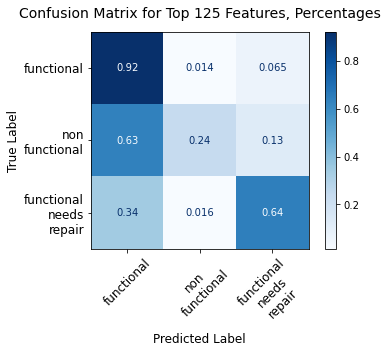

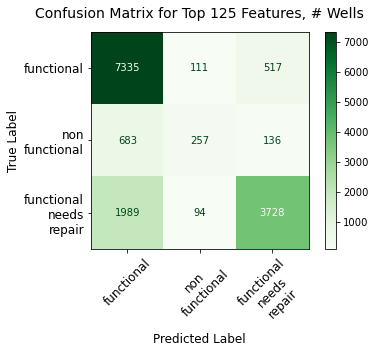

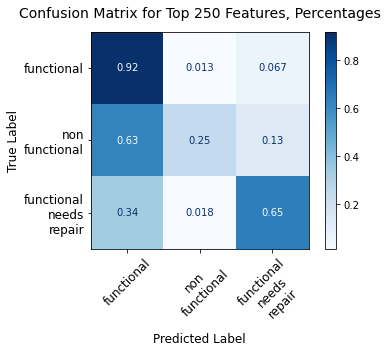

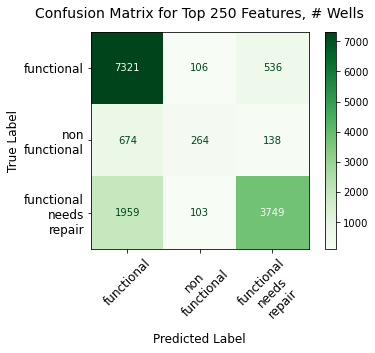

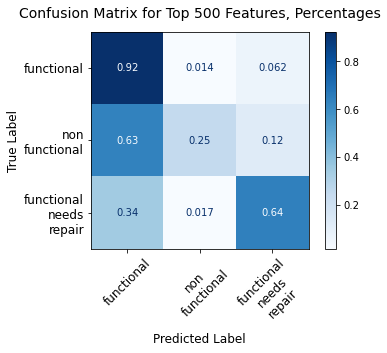

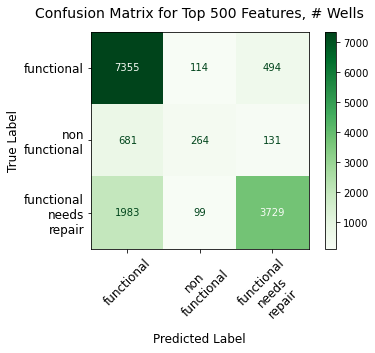

In [183]:
df_ns, X_train_vals_1a, clfs_1a, \
acc_scores_1a, jaccard_scores_1a, \
feat_importances_1a, \
parameters_1a, imp_table_1a, \
summ_imp_table_1a, \
summ_imp_table_subs_1a = top_n_multiple_dt_model_subs(df, features, features_top_n, 
                                                      all_model_features, max_depth=20,
                                                      n_range = [50, 100, 125, 250, 500], 
                                                      criterion='entropy', 
                                                      col_title_length=7, num_feats_incl=100)


In [184]:
acc_scores_1a    # n = [50, 100, 125, 250, 500]

[76.01346801346801,
 76.23569023569023,
 76.22895622895622,
 76.32323232323233,
 76.41750841750842]

### INSTALLER, LGA, multiple 'n' values

In [197]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

Accuracy score, Jaccard score, and confusion matrix for n = 50:

Accuracy score:  75.8114478114478
Mean Training Score: 79.59%
Mean Test Score: 75.81%
Jaccard score:  [0.68493795 0.18650493 0.57453368]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.123433
quantity_group_seasonal                        0.097133
quantity_group_enough                          0.068473
quantity_group_insufficient                    0.056391
waterpoint_type_communal standpipe multiple    0.024777
extraction_type_class_submersible              0.023957
permit_True                                    0.022381
lga_duplicate_Bariadi                          0.021076
payment_pay per bucket                         0.019104
public_meeting_True                            0.018963


Roll-up summary feature importance table, all features


Importance
var_abbr            
quantit     0.232379
lga_dup     0.186250
waterpo     0.167384
install     0.105947
payment     0.070021
source_     0.065102
managem     0.055668
extract     0.053902
permit_     0.022381
water_q     0.022001
public_     0.018963


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.232379
lga_dup     0.178076
waterpo     0.167384
install     0.089832
payment     0.070021
source_     0.063555
managem     0.052694
extract     0.051708
permit_     0.022381
water_q     0.021646
public_     0.018963


The top 100 dummy variables contribute Importance    0.96864
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 100:

Accuracy score:  75.83164983164983
Mean Training Score: 78.81%
Mean Test Score: 75.83%
Jaccard score:  [0.68766282 0.19307692 0.56626506]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.128819
quantity_group_seasonal                        0.100543
quantity_group_enough                          0.070977
quantity_group_insufficient                    0.057845
waterpoint_type_communal standpipe multiple    0.024720
lga_duplicate_Bariadi                          0.022103
extraction_type_class_submersible              0.021227
payment_pay monthly                            0.016553
source_spring                                  0.016474
permit_True                                    0.015957


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.241868
quantit     0.240242
waterpo     0.170026
install     0.089189
payment     0.060235
source_     0.059932
extract     0.048080
managem     0.043980
water_q     0.016606
permit_     0.015957
public_     0.013884


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.240242
lga_dup     0.204450
waterpo     0.170026
install     0.060508
payment     0.060235
source_     0.059113
extract     0.047115
managem     0.040510
permit_     0.015957
water_q     0.014521
public_     0.013884


The top 100 dummy variables contribute Importance    0.926563
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 125:

Accuracy score:  75.74410774410775
Mean Training Score: 78.79%
Mean Test Score: 75.74%
Jaccard score:  [0.68697108 0.19266055 0.56470036]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.129063
quantity_group_seasonal                        0.100507
quantity_group_enough                          0.070259
quantity_group_insufficient                    0.058332
waterpoint_type_communal standpipe multiple    0.024516
lga_duplicate_Bariadi                          0.022039
extraction_type_class_submersible              0.021292
payment_pay monthly                            0.016545
source_spring                                  0.015883
management_vwc                                 0.015424


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.244761
quantit     0.239786
waterpo     0.171971
install     0.088306
source_     0.059666
payment     0.059211
extract     0.047282
managem     0.043367
water_q     0.017193
permit_     0.015231
public_     0.013227


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.239786
lga_dup     0.201309
waterpo     0.171971
payment     0.059211
source_     0.058989
install     0.057211
extract     0.046994
managem     0.042145
permit_     0.015231
water_q     0.014776
public_     0.013227


The top 100 dummy variables contribute Importance    0.920849
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 250:

Accuracy score:  75.80471380471381
Mean Training Score: 78.83%
Mean Test Score: 75.80%
Jaccard score:  [0.68697029 0.20229885 0.56506796]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.128883
quantity_group_seasonal                        0.100044
quantity_group_enough                          0.070226
quantity_group_insufficient                    0.058382
waterpoint_type_communal standpipe multiple    0.024015
lga_duplicate_Bariadi                          0.021805
extraction_type_class_submersible              0.020800
payment_pay monthly                            0.016974
payment_pay per bucket                         0.014937
source_spring                                  0.014908


Roll-up summary feature importance table, all features


Importance
var_abbr            
quantit     0.239225
lga_dup     0.238823
waterpo     0.169943
install     0.100422
payment     0.059429
source_     0.056929
extract     0.047768
managem     0.043272
water_q     0.016409
permit_     0.014651
public_     0.013127


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.239225
lga_dup     0.197434
waterpo     0.169943
install     0.059526
payment     0.059429
source_     0.056420
extract     0.047230
managem     0.041922
permit_     0.014651
water_q     0.013913
public_     0.013127


The top 100 dummy variables contribute Importance    0.91282
dtype: float64

Accuracy score, Jaccard score, and confusion matrix for n = 500:

Accuracy score:  75.84511784511785
Mean Training Score: 78.84%
Mean Test Score: 75.85%
Jaccard score:  [0.68800075 0.20030581 0.56544175]
Individual feature importances, top 10


Importance
waterpoint_type_other                          0.129208
quantity_group_seasonal                        0.100469
quantity_group_enough                          0.070664
quantity_group_insufficient                    0.058007
waterpoint_type_communal standpipe multiple    0.024181
lga_duplicate_Bariadi                          0.022019
extraction_type_class_submersible              0.020114
payment_pay monthly                            0.015965
permit_True                                    0.015816
management_vwc                                 0.014788


Roll-up summary feature importance table, all features


Importance
var_abbr            
quantit     0.239845
lga_dup     0.235698
waterpo     0.169650
install     0.108666
payment     0.057400
source_     0.056452
extract     0.046432
managem     0.041618
permit_     0.015816
water_q     0.015669
public_     0.012755


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
quantit     0.239845
lga_dup     0.195892
waterpo     0.169650
payment     0.057400
source_     0.055336
install     0.053996
extract     0.045898
managem     0.040244
permit_     0.015816
water_q     0.013098
public_     0.012755


The top 100 dummy variables contribute Importance    0.899931
dtype: float64



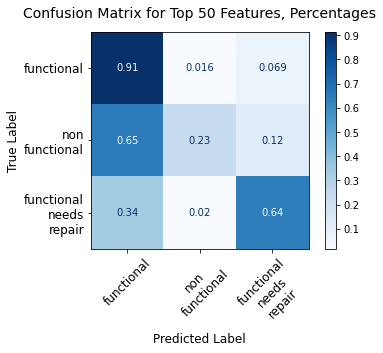

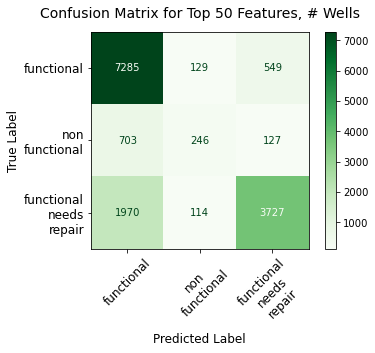

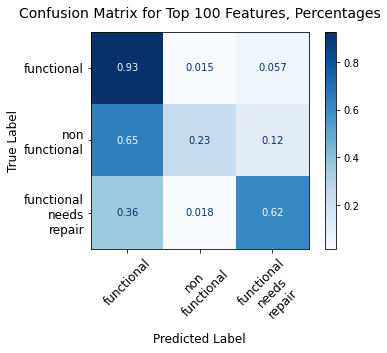

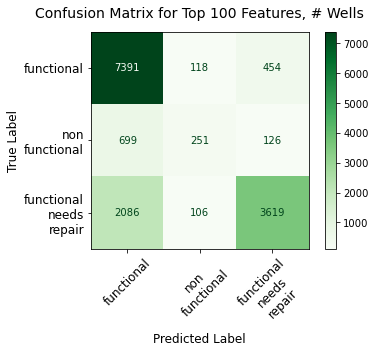

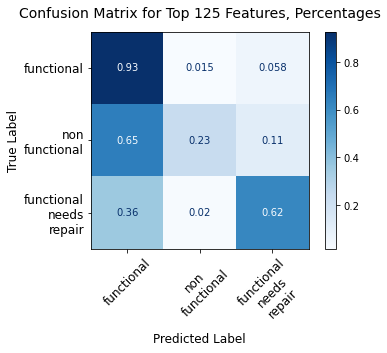

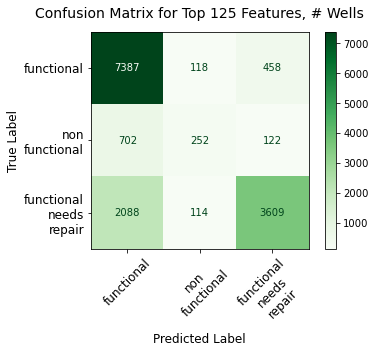

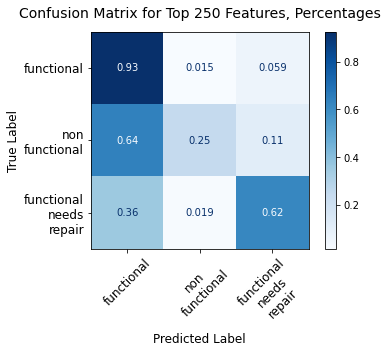

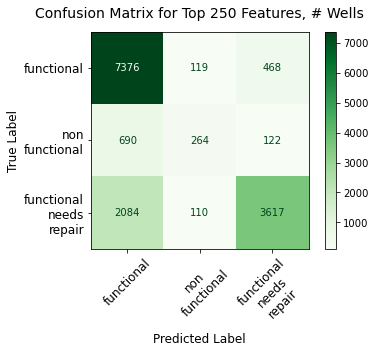

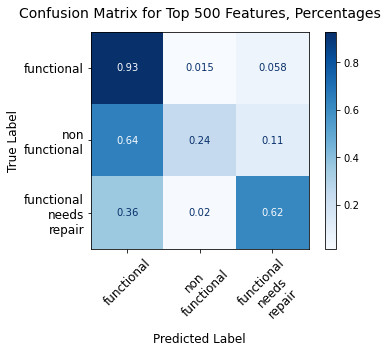

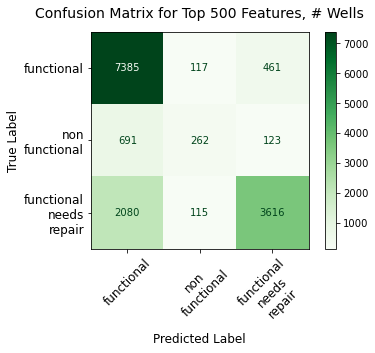

In [198]:
features = ['installer', 'management', 'lga', 'payment', 'water_quality', 
            'quantity_group', 'source', 'extraction_type_class', 'status_group',
           'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['installer', 'lga']

all_model_features = ['installer_duplicate', 'lga_duplicate', 'permit', 'public_meeting',
                      'payment', 'water_quality', 'quantity_group', 'source', 'management', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']

df_ns, X_train_vals_3, clfs_3, accs_3, \
js_3, feat_imp_3, \
params_3, imp_tables_3, \
sum_imps_3, sum_sub_imps_3 = top_n_multiple_dt_model_subs(df, features, features_top_n, 
                                                          all_model_features, max_depth=20,
                                                          n_range = [50, 100, 125, 250, 500], 
                                                          criterion='entropy', col_title_length=7, 
                                                          num_feats_incl=100)


In [199]:
accs_3

[75.8114478114478,
 75.83164983164983,
 75.74410774410775,
 75.76430976430977,
 75.8114478114478]

## Addressing imbalanced classes to get better prediction of non-functional functional-needing-repairs wells

Because class imbalance seems to play an imporantant role in the problems of correctly predicting non-functional and functional-needing-repair wells, it's necessary to address this issue; otherwise, the model is not much good for correctly predicting the wells most in need of repair.  

There are a number of ways to address the imbalanced class issue.  I will utilize two approaches in this decision tree modeling section:  class_weight (setting class_weight='balanced' or to a dictionary of weights for the target classes) and SMOTE (Synthetic Minority Oversampling Technique). 

The class_weight argument is used when instantiating the decision tree classifier in scikit-learn, and enables us to adjust how the algorithm treats errors of different kinds.  The default value for class_weight is 'None', which basically means that classification errors are treated the same whether the error is a false negative (e.g., a non-functional well categorized as functional) or a false positive (e.g., a functional well categorized as non-functional).  However, I would argue that these errors are not equal; mis-identifying non-functional wells as functional is a bigger problem than is identifying functional wells as non-functional.  

SMOTE takes a different approach to the imbalanced classes problem by oversampling the minority classes to arrive at a distribution of classes and supporting data that are equal in size.  Having equal classes gives the algorithm a better shot at correctly predicting a new well that it has not encountered before.  To understand how to perform the SMOTE transformation, I extensively referenced Dr. Jason Brownlee's article "SMOTE for Imbalanced Classification with Python"; URL is https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ .

Whereas the class_weight argument is made when instantiating the decision tree classifier (after train-test-split), SMOTE resampling must be done before train-test-split.  After resampling is completed, the data is fed into the train-test-split process and modeling process as before.  

## Decision Trees: Class_weight='balanced'; FUNDER and LGA; max_depth=20 (optimized hyperparameters)

Accuracy score, Jaccard score, and confusion matrix for n = 25:
Accuracy score:  64.53872053872054
Mean Training Score: 69.62%
Mean Test Score: 64.54%
Jaccard score:  [0.54757074 0.17560976 0.56172004]
Individual feature importances--showing top 10:


Importance
quantity_group_seasonal        0.085884
extraction_type_class_other    0.085085
quantity_group_insufficient    0.046654
quantity_group_enough          0.044859
lga_duplicate_Bariadi          0.040066
lga_duplicate_Kigoma Rural     0.034261
source_spring                  0.028937
payment_pay per bucket         0.025807
permit_True                    0.025131
waterpoint_type_hand pump      0.023470


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.194618
quantit     0.180077
extract     0.121008
funder_     0.109894
payment     0.094605
source_     0.090686
managem     0.078027
waterpo     0.060813
water_q     0.025142
permit_     0.025131
public_     0.019999



Accuracy score, Jaccard score, and confusion matrix for n = 50:
Accuracy score:  63.87878787878788
Mean Training Score: 68.12%
Mean Test Score: 63.88%
Jaccard score:  [0.54120172 0.16951896 0.56453577]
Individual feature importances--showing top 10:


Importance
quantity_group_seasonal                    0.087736
extraction_type_class_other                0.086747
quantity_group_insufficient                0.047230
quantity_group_enough                      0.045568
lga_duplicate_Bariadi                      0.040551
lga_duplicate_Kigoma Rural                 0.033951
source_spring                              0.029435
payment_pay per bucket                     0.022500
waterpoint_type_hand pump                  0.021935
funder_duplicate_government_of_tanzania    0.021283


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.243795
quantit     0.183267
extract     0.120405
funder_     0.103287
source_     0.082157
managem     0.074885
payment     0.073947
waterpo     0.060365
water_q     0.021816
public_     0.020530
permit_     0.015548



Accuracy score, Jaccard score, and confusion matrix for n = 100:
Accuracy score:  64.24242424242425
Mean Training Score: 68.19%
Mean Test Score: 64.24%
Jaccard score:  [0.54438951 0.17715112 0.55762636]
Individual feature importances--showing top 10:


Importance
quantity_group_seasonal                    0.090144
extraction_type_class_other                0.088943
quantity_group_insufficient                0.047977
quantity_group_enough                      0.046659
lga_duplicate_Bariadi                      0.041499
lga_duplicate_Kigoma Rural                 0.033358
source_spring                              0.026797
funder_duplicate_government_of_tanzania    0.022967
waterpoint_type_hand pump                  0.022071
payment_unknown                            0.019918


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.303698
quantit     0.187580
extract     0.120618
funder_     0.100349
source_     0.069444
payment     0.065834
managem     0.058061
waterpo     0.053156
water_q     0.017012
public_     0.013542
permit_     0.010706



Accuracy score, Jaccard score, and confusion matrix for n = 125:
Accuracy score:  64.16835016835016
Mean Training Score: 68.20%
Mean Test Score: 64.17%
Jaccard score:  [0.54256808 0.17624336 0.55773226]
Individual feature importances--showing top 10:


Importance
quantity_group_seasonal                    0.089948
extraction_type_class_other                0.088932
quantity_group_enough                      0.047872
quantity_group_insufficient                0.047862
lga_duplicate_Bariadi                      0.041621
lga_duplicate_Kigoma Rural                 0.033356
source_spring                              0.025837
funder_duplicate_government_of_tanzania    0.022832
waterpoint_type_hand pump                  0.021894
payment_unknown                            0.019841


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.305735
quantit     0.188482
extract     0.119037
funder_     0.100861
source_     0.069887
payment     0.064469
managem     0.056845
waterpo     0.053109
water_q     0.016942
public_     0.013122
permit_     0.011510



Accuracy score, Jaccard score, and confusion matrix for n = 250:
Accuracy score:  63.77777777777778
Mean Training Score: 67.85%
Mean Test Score: 63.78%
Jaccard score:  [0.53751881 0.17410926 0.55649844]
Individual feature importances--showing top 10:


Importance
quantity_group_seasonal                    0.090825
extraction_type_class_other                0.089302
quantity_group_insufficient                0.048172
quantity_group_enough                      0.048099
lga_duplicate_Bariadi                      0.041667
lga_duplicate_Kigoma Rural                 0.033493
source_spring                              0.026834
funder_duplicate_government_of_tanzania    0.022704
waterpoint_type_hand pump                  0.022080
payment_unknown                            0.019171


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.299581
quantit     0.189895
extract     0.118867
funder_     0.108153
source_     0.071803
payment     0.064297
managem     0.054970
waterpo     0.052514
water_q     0.015431
public_     0.012648
permit_     0.011842

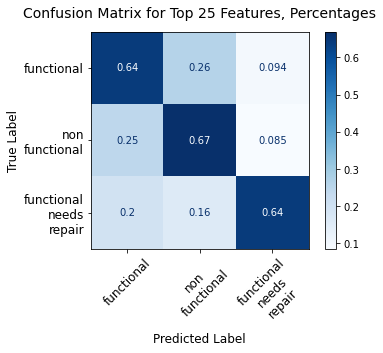

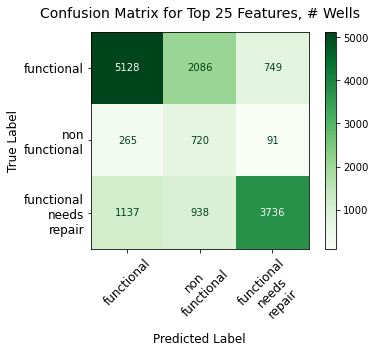

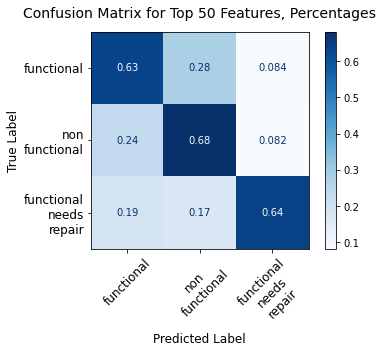

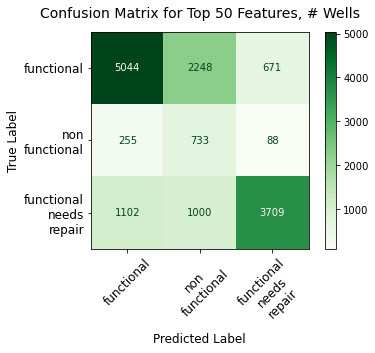

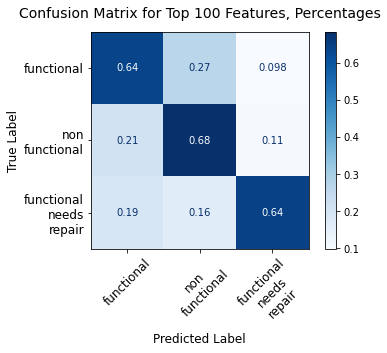

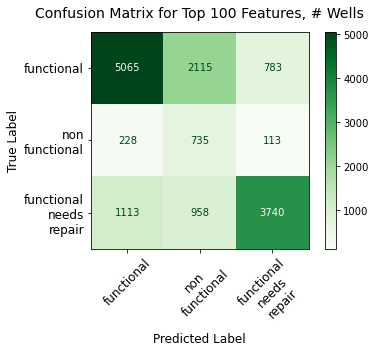

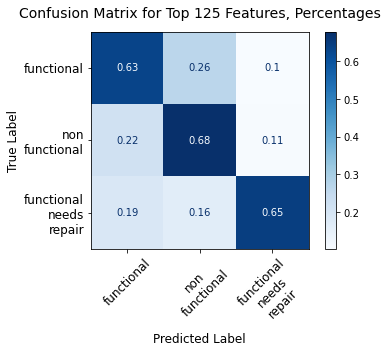

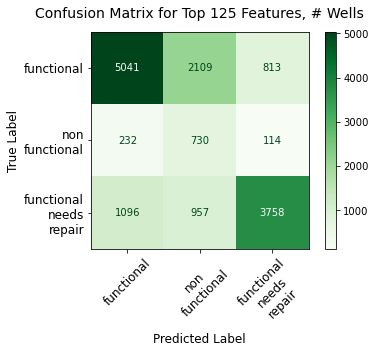

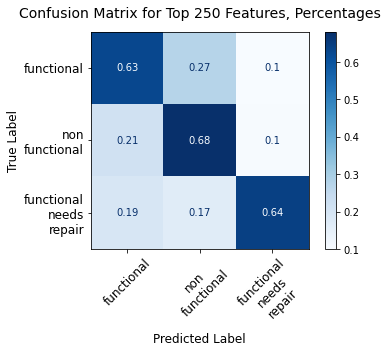

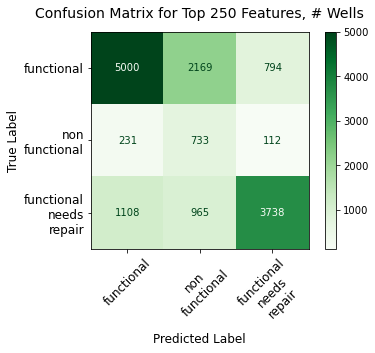

In [245]:
# criterion='gini', max_depth=20

X_train_vals_cw, clfs_cw, acc_scores_cw, \
jaccard_scores_cw, feat_importances_cw, \
parameters_cw, imp_tables_cw, \
summ_importance_tables_cw = top_n_multiple_dt_model_cw(df, features, features_top_n, all_model_features, 
                                                       n_range=[25, 50, 100, 125, 250], random_state=123, 
                                                       criterion='gini', max_depth=20, col_title_length=7, 
                                                       class_weight='balanced', min_samples_split=2)


In [246]:
acc_scores_cw

[64.53872053872054,
 63.87878787878788,
 64.24242424242425,
 64.16835016835016,
 63.77777777777778]

## Decision Trees:  SMOTE-rebalanced

### SMOTE modeling:  FUNDER, LGA (multiple 'n'), payment, water_quality, quantity_group, source, extraction_type_class, waterpoint_type, public_meeting, permit; max_depth=20, criterion='entropy'

In [256]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [257]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']



Accuracy score, Jaccard score, and confusion matrix for n = 50:

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})
Accuracy score:  66.27609427609428
Mean Training Score: 72.32%
Mean Test Score: 66.28%
Jaccard score:  [0.57178218 0.1706716  0.5394656 ]

Individual feature importances--showing top 10:


Importance
extraction_type_class_other                0.096429
quantity_group_seasonal                    0.096424
quantity_group_insufficient                0.061958
quantity_group_enough                      0.053714
lga_duplicate_Bariadi                      0.041181
lga_duplicate_Kigoma Rural                 0.030926
payment_pay per bucket                     0.028159
source_spring                              0.024387
funder_duplicate_government_of_tanzania    0.023829
waterpoint_type_hand pump                  0.022935


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.231069
quantit     0.215917
extract     0.121833
funder_     0.100069
payment     0.082413
source_     0.072599
waterpo     0.065667
managem     0.061738
permit_     0.018639
water_q     0.015330
public_     0.014725




Accuracy score, Jaccard score, and confusion matrix for n = 100:

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})
Accuracy score:  62.525252525252526
Mean Training Score: 72.42%
Mean Test Score: 62.53%
Jaccard score:  [0.54433677 0.15844913 0.52769037]

Individual feature importances--showing top 10:


Importance
extraction_type_class_other                0.096964
quantity_group_seasonal                    0.094750
quantity_group_insufficient                0.060141
quantity_group_enough                      0.053134
lga_duplicate_Bariadi                      0.040815
lga_duplicate_Kigoma Rural                 0.030398
source_spring                              0.025638
funder_duplicate_government_of_tanzania    0.024605
waterpoint_type_hand pump                  0.024327
payment_pay per bucket                     0.019510


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.278911
quantit     0.211861
extract     0.123222
funder_     0.094923
payment     0.067003
waterpo     0.065889
source_     0.063000
managem     0.055845
water_q     0.017013
public_     0.012418
permit_     0.009916




Accuracy score, Jaccard score, and confusion matrix for n = 125:

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})
Accuracy score:  66.1010101010101
Mean Training Score: 73.02%
Mean Test Score: 66.10%
Jaccard score:  [0.56890816 0.17399157 0.54117116]

Individual feature importances--showing top 10:


Importance
extraction_type_class_other                0.095555
quantity_group_seasonal                    0.094592
quantity_group_insufficient                0.059975
quantity_group_enough                      0.054945
lga_duplicate_Bariadi                      0.040529
lga_duplicate_Kigoma Rural                 0.030436
funder_duplicate_government_of_tanzania    0.024614
waterpoint_type_hand pump                  0.024382
source_spring                              0.024235
payment_pay per bucket                     0.020381


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.279871
quantit     0.213325
extract     0.120562
funder_     0.097217
waterpo     0.067902
payment     0.064426
source_     0.064181
managem     0.059491
water_q     0.013926
public_     0.010556
permit_     0.008544

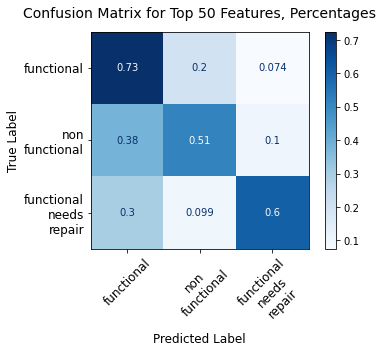

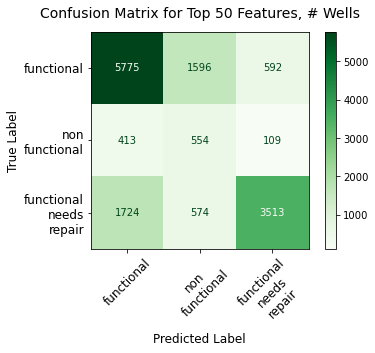

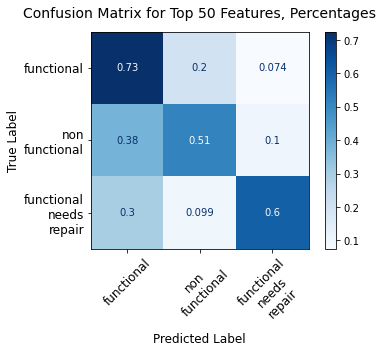

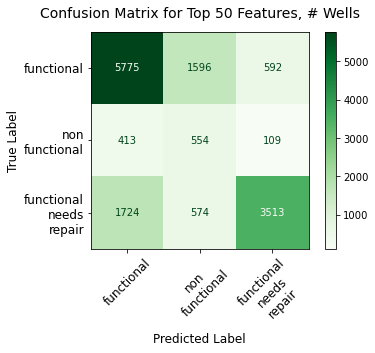

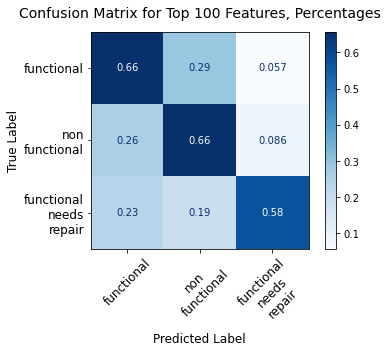

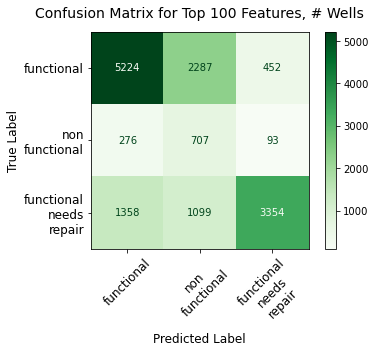

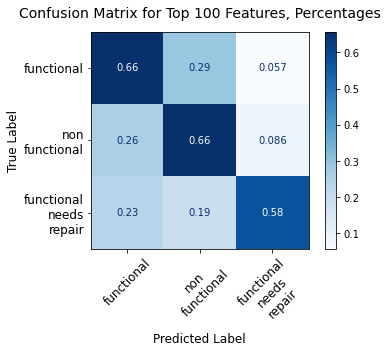

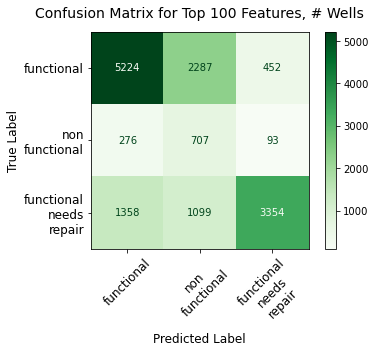

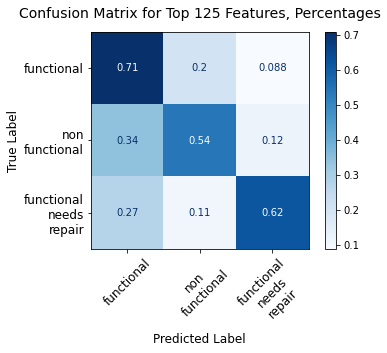

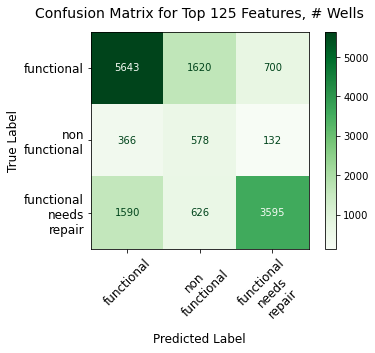

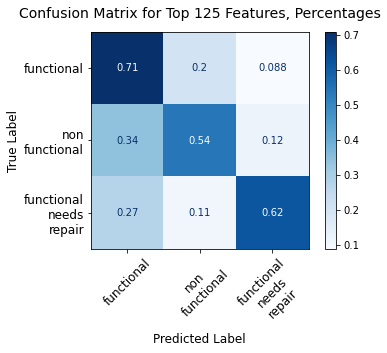

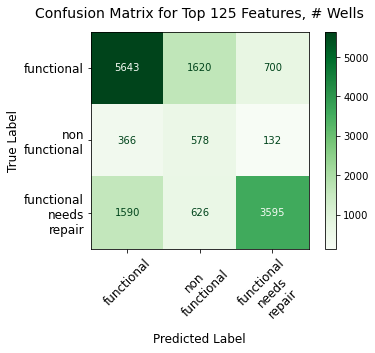

In [258]:
df_ns, X_trains_SMOTE, clfs_SMOTE, \
acc_scores_SMOTE, train_scores_SMOTE, \
test_scores_SMOTE, jaccard_scores_SMOTE, \
feat_importances_SMOTE, \
parameters_SMOTE, imp_tables_SMOTE, \
summ_importance_tables_SMOTE = imb_mult_top_n_SMOTE_dt(df, features, features_top_n, all_model_features, 
                                                       random_state=123, n_range=[50, 100, 125], criterion='gini', 
                                                       max_depth=20, col_title_length=7, cmap=plt.cm.Blues)


In [259]:
train_scores_SMOTE

[0.7232191855998243, 0.7241795631654044, 0.7301887827900341]

In [260]:
test_scores_SMOTE

[0.6627609427609428, 0.6252525252525253, 0.661010101010101]

### SMOTE DT: INSTALLER, LGA (multiple 'n'), payment, water_quality, quantity_group, source, extraction_type_class, waterpoint_type, public_meeting, permit; max_depth=20, criterion='entropy'

In [280]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [281]:
features = ['installer', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['installer', 'lga']

all_model_features = ['installer_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']



Accuracy score, Jaccard score, and confusion matrix for n = 50:

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})
Accuracy score:  64.74747474747474
Mean Training Score: 71.66%
Mean Test Score: 64.75%
Jaccard score:  [0.55784501 0.16931788 0.53477517]

Individual feature importances--showing top 10:


Importance
quantity_group_seasonal           0.098449
extraction_type_class_other       0.097110
quantity_group_insufficient       0.065400
quantity_group_enough             0.053018
lga_duplicate_Bariadi             0.042206
lga_duplicate_Kigoma Rural        0.031588
source_spring                     0.024729
waterpoint_type_hand pump         0.020042
installer_duplicate_government    0.018692
payment_pay per bucket            0.018578


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.239407
quantit     0.221165
extract     0.132984
install     0.090175
source_     0.076019
payment     0.069727
managem     0.069251
waterpo     0.055876
water_q     0.017165
permit_     0.015868
public_     0.012363




Accuracy score, Jaccard score, and confusion matrix for n = 100:

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})
Accuracy score:  64.47138047138047
Mean Training Score: 70.84%
Mean Test Score: 64.47%
Jaccard score:  [0.55957828 0.16031957 0.52968181]

Individual feature importances--showing top 10:


Importance
extraction_type_class_other    0.100764
quantity_group_seasonal        0.100697
quantity_group_insufficient    0.064602
quantity_group_enough          0.056432
lga_duplicate_Bariadi          0.043382
lga_duplicate_Kigoma Rural     0.032377
source_spring                  0.025120
payment_pay per bucket         0.023654
payment_pay monthly            0.019514
waterpoint_type_hand pump      0.019009


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.271306
quantit     0.226431
extract     0.137797
install     0.089114
payment     0.069509
source_     0.065482
waterpo     0.059245
managem     0.052718
water_q     0.010980
permit_     0.009357
public_     0.008060




Accuracy score, Jaccard score, and confusion matrix for n = 125:

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})
Accuracy score:  60.86868686868687
Mean Training Score: 70.94%
Mean Test Score: 60.87%
Jaccard score:  [0.52284372 0.15104696 0.53310323]

Individual feature importances--showing top 10:


Importance
quantity_group_seasonal           0.100069
extraction_type_class_other       0.099106
quantity_group_insufficient       0.064578
quantity_group_enough             0.058144
lga_duplicate_Bariadi             0.043075
lga_duplicate_Kigoma Rural        0.032627
source_spring                     0.024942
payment_pay per bucket            0.023515
waterpoint_type_hand pump         0.021033
installer_duplicate_government    0.018575


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.270949
quantit     0.227465
extract     0.134814
install     0.091466
payment     0.066924
source_     0.065976
waterpo     0.061739
managem     0.051696
water_q     0.010758
permit_     0.009610
public_     0.008602

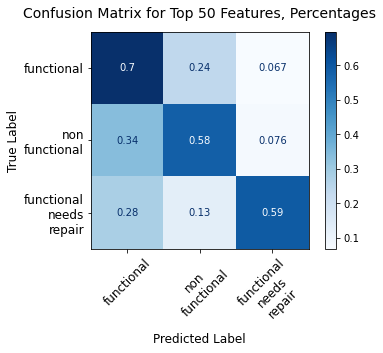

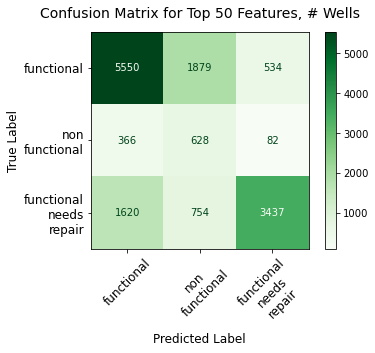

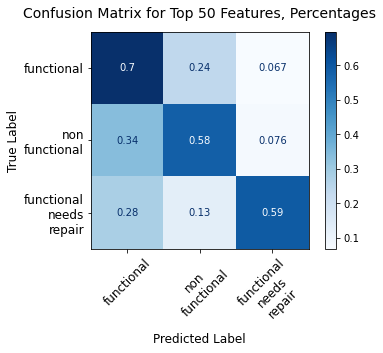

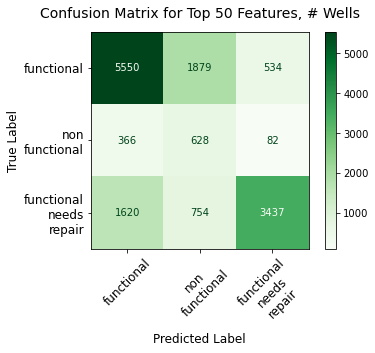

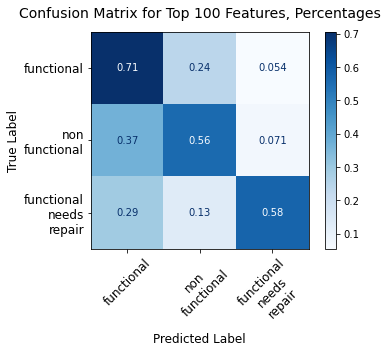

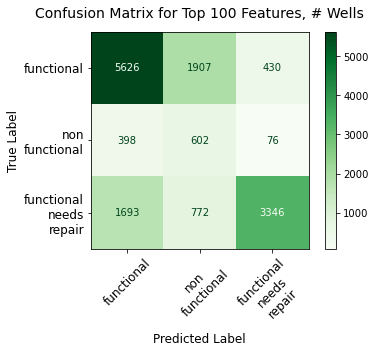

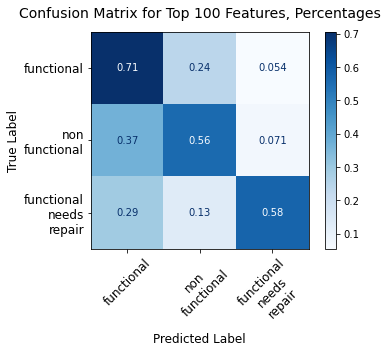

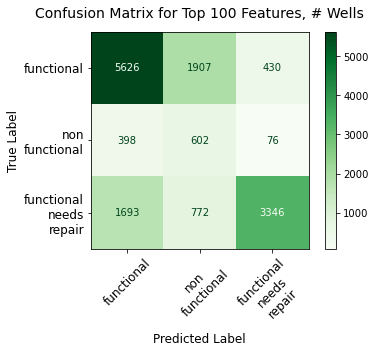

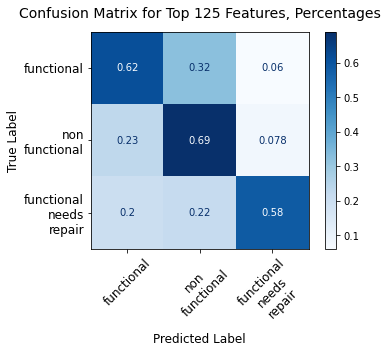

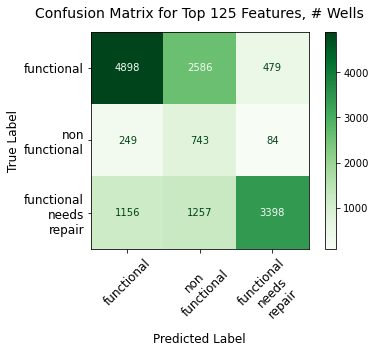

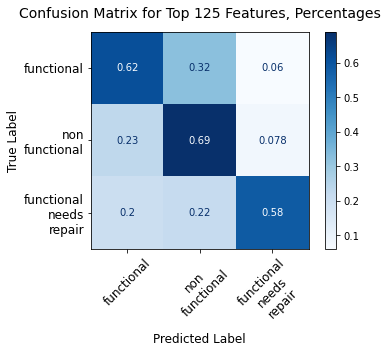

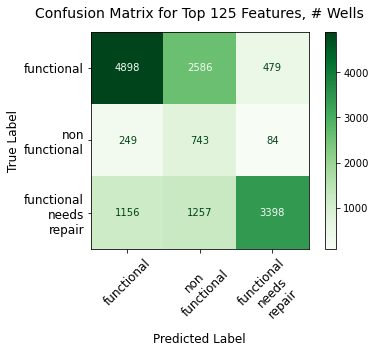

In [282]:
# optimized parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}

df_ns, X_trains_SMOTE, clfs_SMOTE, \
acc_scores_SMOTE, train_scores_SMOTE, \
test_scores_SMOTE, jaccard_scores_SMOTE, \
feat_importances_SMOTE, \
parameters_SMOTE, imp_tables_SMOTE, \
summ_importance_tables_SMOTE = imb_mult_top_n_SMOTE_dt(df, features, features_top_n, all_model_features, 
                                                       random_state=123, n_range=[50, 100, 125], 
                                                       criterion='gini', max_depth=20, min_samples_split=5, 
                                                       col_title_length=7, cmap=plt.cm.Blues)


In [283]:
acc_scores_SMOTE

[64.74747474747474, 64.47138047138047, 60.86868686868687]

## Findings on class_weight vs. SMOTE (resampling) for reducing false negatives

In looking at the confusion matrices that result from using class_weight vs. resampling (SMOTE) using decision trees for modeling, we can see that both approaches do significantly better at correctly predicting wells that need repair or are non-functional ('false negatives').  This is an important finding, since such wells are more important to identify correctly than functional wells, as discussed above.

Overall accuracy levels are just slightly higher with SMOTE than in using the class_weight argument in the decision tree classifier.  However, class_weight = 'balanced' does a much better job of reducing costly false negatives (non-functional and needing-repair wells categorized as 'functional'--0.19 and 0.2, respectively for balanced class_weight vs. SMOTE, which ranged from 26% up to 40%).

__Note__:  while not providing the highest overall accuracy score, the rebalanced DT model (class_weight='balanced') with funder, scheme_name, and lga n=25 provide the _lowest false negatives_ (non-functional and needing-repair wells categorized as 'functional') that I've seen with decision tree models (0.11 and 0.20, respectively).

**_Final thoughts_**:  If overall accuracy of prediction is the goal, then the original (non-resampled) data set will give the highest accuracy scores for decision tree models.  However, if the goal is to more accurately predict non-functional or functional-needs-repairs wells, then it's critically important to use a rebalancing method.  Between SMOTE and class_weight='balanced' approaches, I found that class_weight='balanced' provided better performance in reducing false-negative errors, while giving overall accuracy scores that are only 1-2% less than SMOTE overall.

# Modeling:  Bagged Trees

## Bagged Trees model, no resampling, using 'lga' as geographic locator

In [285]:
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [286]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [287]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


In [288]:
# Run function without resampling first

df, X, y = top_n_encode(df, features, features_top_n, all_model_features, n=125, p=126)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

##### Max_depth=20

In [289]:
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=20, 
                                                       random_state=123), n_estimators=20)

# Fit to the training data
bagged_tree.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        random_state=123),
                  n_estimators=20)

In [291]:
# Training accuracy score
bagged_train_score = bagged_tree.score(X_train, y_train)
bagged_train_score

0.8138271604938272

In [292]:
# Testing accuracy score
bagged_test_score = bagged_tree.score(X_test, y_test)
bagged_test_score

0.7786531986531987

In [293]:
# Model predictions
bagged_tree_train_preds = bagged_tree.predict(X_train)
bagged_tree_test_preds = bagged_tree.predict(X_test)


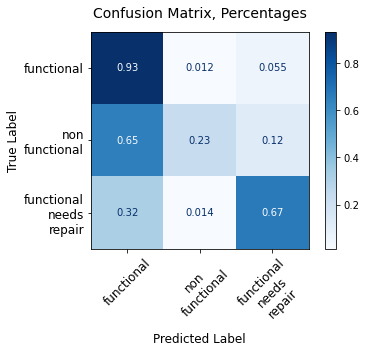

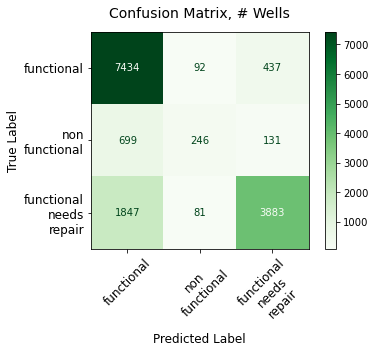

In [295]:
# Bagged tree plot_confusion_matrix

plot_conf_matrix_norm_abs(df, bagged_tree, X_test, y_test, title='Confusion Matrix', 
                          titlefont=14, x_y_tick_font=12, pad=14, x_y_label_font=12, 
                          xticks_rotation=45, cmap=plt.cm.Blues)


We can see that bagged trees gives similar results as previous tree models in terms of false negative errors (miscategorizing 68% of non-functional wells as functional and 33% of functional-needing-repair wells as functional).  Let's look at bagged trees with SMOTE-resampled data.

### Running bagged tree model with SMOTE data and optimized n_estimators parameter (max_depth=20) 

In [306]:
# Instantiate a BaggingClassifier
bagged_tree_20 = BaggingClassifier(DecisionTreeClassifier(random_state=123, criterion='gini', max_depth=20, 
                                                          min_samples_split=5), n_jobs=-1, n_estimators=1000)

# Fit to the training data
bagged_tree_20.fit(X_train_SMOTE, y_train_SMOTE)
print(bagged_tree_20.get_params())


{'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 20, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 5, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': 123, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=123), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [307]:
# Training accuracy score
bagged_train_score_20 = bagged_tree_20.score(X_train_SMOTE, y_train_SMOTE)
print("Bagged tree training score:  {}".format(bagged_train_score_20))

# Testing accuracy score
bagged_test_score_20 = bagged_tree_20.score(X_test, y_test)
print("Bagged tree test score:  {}".format(bagged_test_score_20))

# Model predictions
bagged_tree_train_preds_20 = bagged_tree_20.predict(X_train_SMOTE)
bagged_tree_test_preds_20 = bagged_tree_20.predict(X_test)


Bagged tree training score:  0.7684941279771704
Bagged tree test score:  0.6812121212121212


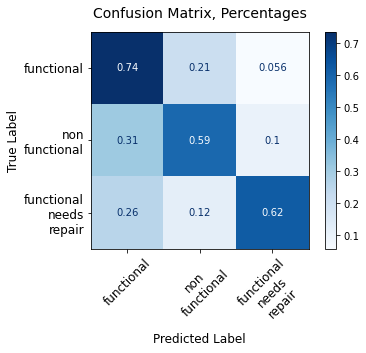

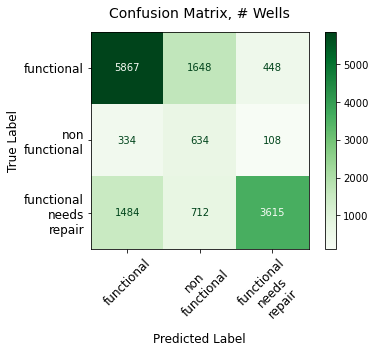

In [308]:
disp_bagged_tree_20 = plot_conf_matrix_norm_abs(df_n, bagged_tree_20, X_test, y_test, 
                                                title='Confusion Matrix', titlefont=14, x_y_tick_font=12, 
                                                pad=14, x_y_label_font=12, xticks_rotation=45, cmap=plt.cm.Blues)

### Findings on performance of bagged tree models

As with decision trees, bagged trees require rebalancing to minimize costly false negatives.  And similar to decision trees, max_depth is a very important parameter.  When max_depth=30 with SMOTE data, training accuracy is 81% and test accuracy is 78%.  When max_depth=20, however, these values fall to 74.7% and 71.7%, respectively.

# Modeling:  Random Forest

## Modeling--Random Forest, non-rebalanced data

In [315]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

### Funder, LGA (n=125); permit, public_meeting; max_depth=20

In [316]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


0.7955106621773288
0.7643097643097643
Individual feature importances--showing top 10:


Importance
quantity_group_enough                 0.078093
extraction_type_class_other           0.060578
waterpoint_type_other                 0.043387
quantity_group_insufficient           0.039997
waterpoint_type_communal standpipe    0.035302
payment_pay per bucket                0.024424
waterpoint_type_hand pump             0.022998
extraction_type_class_handpump        0.021937
payment_pay monthly                   0.021220
public_meeting_True                   0.018275


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.211396
quantit     0.139955
funder_     0.134374
waterpo     0.118894
extract     0.106727
payment     0.085410
source_     0.070862
managem     0.055778
water_q     0.040666
public_     0.018275
permit_     0.017663

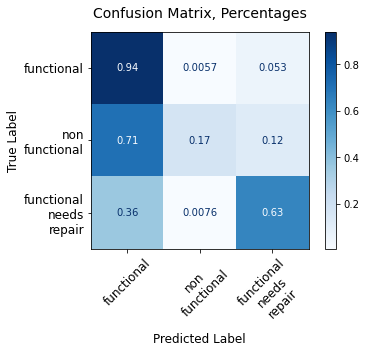

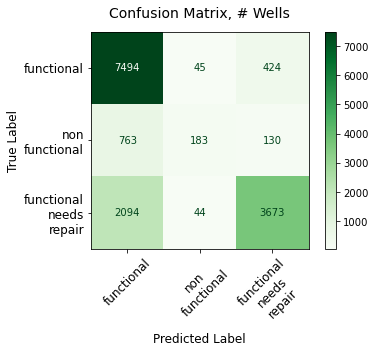

In [317]:
df1, X_train, clf_rf, \
train_score, test_score, \
params, imp_table, \
summ_imp_table = rf_model_run(df, features, features_top_n, all_model_features, n=125, p=126, 
                              run_SMOTE=False, test_size=0.25, random_state=123, criterion='entropy', 
                              n_estimators=20, max_depth=20, n_jobs=-1, min_samples_leaf=1, 
                              min_samples_split=2)


In [318]:
imp_table.head(30)

Importance
quantity_group_enough                          0.078093
extraction_type_class_other                    0.060578
waterpoint_type_other                          0.043387
quantity_group_insufficient                    0.039997
waterpoint_type_communal standpipe             0.035302
payment_pay per bucket                         0.024424
waterpoint_type_hand pump                      0.022998
extraction_type_class_handpump                 0.021937
payment_pay monthly                            0.021220
public_meeting_True                            0.018275
quantity_group_seasonal                        0.018087
source_spring                                  0.017877
permit_True                                    0.017663
payment_unknown                                0.017497
funder_duplicate_government_of_tanzania        0.016777
management_vwc                                 0.016047
water_quality_soft                             0.015590
source_shallow well                            0.015162
water_quality_unknown                          0.014160
waterpoint_type_communal standpipe multiple    0.013827
lga_duplicate_Bariadi                          0.013689
payment_pay annually                           0.012404
extraction_type_class_submersible              0.012100
source_machine dbh                             0.011702
funder_duplicate_other                         0.011635
lga_duplicate_Kigoma Rural                     0.011275
source_river                                   0.010645
lga_duplicate_Njombe                           0.010222
extraction_type_class_motorpump                0.009978
source_rainwater harvesting                    0.009344

In [319]:
summ_imp_table

Importance
var_abbr            
lga_dup     0.211396
quantit     0.139955
funder_     0.134374
waterpo     0.118894
extract     0.106727
payment     0.085410
source_     0.070862
managem     0.055778
water_q     0.040666
public_     0.018275
permit_     0.017663

Still need to address class imbalance issue due to poor performance on false negatives 

## Modeling--Random Forest, class_weight='balanced'

In [320]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

### FUNDER, LGA, n=125, optimized hyperparameters (max_depth=20)

In [334]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [335]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


0.7726599326599327
0.7207407407407408
Individual feature importances--showing top 10:


Importance
quantity_group_enough                 0.058334
extraction_type_class_other           0.047728
waterpoint_type_other                 0.042880
quantity_group_insufficient           0.041509
lga_duplicate_Bariadi                 0.030109
payment_pay per bucket                0.023973
payment_pay monthly                   0.021833
source_spring                         0.021473
source_river                          0.021108
waterpoint_type_communal standpipe    0.020121


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.250031
funder_     0.145549
quantit     0.120140
waterpo     0.097304
source_     0.090849
extract     0.086905
payment     0.081604
managem     0.056346
water_q     0.038125
permit_     0.018161
public_     0.014988

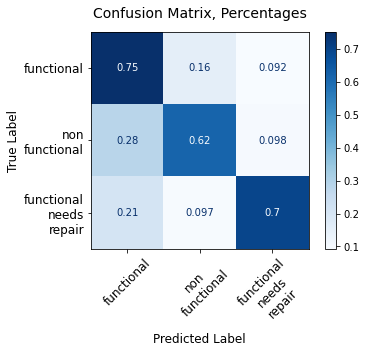

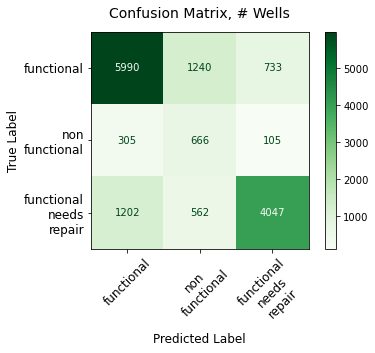

In [336]:
# Optimal Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 
#                      'min_samples_split': 2, 'n_estimators': 100}

df_n, X_train, clf_rf, \
train_score, test_score, \
params, imp_table, \
summ_imp_table = rf_model_run_cw(df, features, features_top_n, all_model_features, n=125, p=126, 
                                 test_size=0.25, random_state=123, criterion='gini', max_depth=20, 
                                 min_samples_leaf=1, min_samples_split=2, class_weight='balanced', 
                                 n_estimators=100, n_jobs=-1)



In [337]:
imp_table.head(50)

Importance
quantity_group_enough                          0.058334
extraction_type_class_other                    0.047728
waterpoint_type_other                          0.042880
quantity_group_insufficient                    0.041509
lga_duplicate_Bariadi                          0.030109
payment_pay per bucket                         0.023973
payment_pay monthly                            0.021833
source_spring                                  0.021473
source_river                                   0.021108
waterpoint_type_communal standpipe             0.020121
lga_duplicate_Kigoma Rural                     0.019129
permit_True                                    0.018161
management_vwc                                 0.017045
quantity_group_seasonal                        0.016665
payment_unknown                                0.016657
waterpoint_type_hand pump                      0.016406
source_shallow well                            0.015490
funder_duplicate_government_of_tanzania        0.015214
public_meeting_True                            0.014988
extraction_type_class_handpump                 0.014876
source_machine dbh                             0.014643
waterpoint_type_communal standpipe multiple    0.014415
water_quality_unknown                          0.013788
water_quality_soft                             0.013402
extraction_type_class_submersible              0.012630
funder_duplicate_dwsp                          0.011949
funder_duplicate_other                         0.011174
source_rainwater harvesting                    0.010756
management_wug                                 0.010305
extraction_type_class_motorpump                0.010208
funder_duplicate_missing                       0.009643
lga_duplicate_Njombe                           0.009615
payment_pay annually                           0.009450
lga_duplicate_Chunya                           0.007824
funder_duplicate_hesawa                        0.007013
management_water_board                         0.006853
management_private_operator                    0.006620
lga_duplicate_Kyela                            0.006564
water_quality_salty                            0.006186
lga_duplicate_Kasulu                           0.006117
payment_pay when scheme fails                  0.006100
lga_duplicate_Makete                           0.005734
funder_duplicate_danida                        0.005715
lga_duplicate_Magu                             0.005429
management_wua                                 0.004763
lga_duplicate_Ukerewe                          0.004576
source_lake                                    0.004512
funder_duplicate_lga                           0.004482
lga_duplicate_Rombo                            0.004186
funder_duplicate_norad                         0.004138

In [338]:
summ_imp_table

Importance
var_abbr            
lga_dup     0.250031
funder_     0.145549
quantit     0.120140
waterpo     0.097304
source_     0.090849
extract     0.086905
payment     0.081604
managem     0.056346
water_q     0.038125
permit_     0.018161
public_     0.014988

### FUNDER, LGA, n=250, optimized hyperparameters (max_depth=20) 

In [339]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [340]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


0.8080808080808081
0.7346801346801347
Individual feature importances--showing top 10:


Importance
quantity_group_enough          0.055201
quantity_group_insufficient    0.041919
extraction_type_class_other    0.032165
waterpoint_type_other          0.030803
lga_duplicate_Bariadi          0.023160
payment_pay per bucket         0.022424
payment_pay monthly            0.021474
permit_True                    0.020828
public_meeting_True            0.019283
quantity_group_seasonal        0.019252


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.252178
funder_     0.184044
quantit     0.119421
payment     0.085573
source_     0.078696
waterpo     0.076489
extract     0.065667
managem     0.059296
water_q     0.038525
permit_     0.020828
public_     0.019283

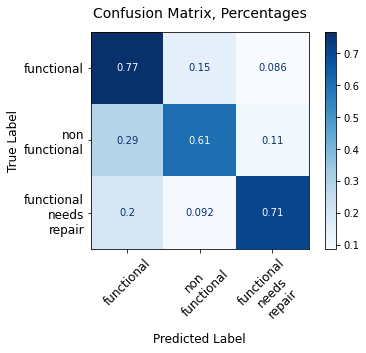

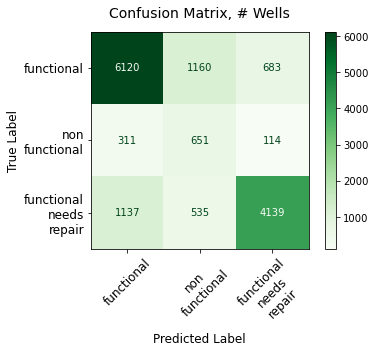

In [341]:
df_n, X_train, clf_rf, \
train_score, test_score, \
params, imp_table, \
summ_imp_table = rf_model_run_cw(df, features, features_top_n, all_model_features, n=250, p=251, 
                                 test_size=0.25, random_state=123, criterion='entropy', max_depth=30, 
                                 min_samples_leaf=1, min_samples_split=2, class_weight='balanced', 
                                 n_estimators=100, n_jobs=-1)




In [342]:
imp_table.head(50)

Importance
quantity_group_enough                          0.055201
quantity_group_insufficient                    0.041919
extraction_type_class_other                    0.032165
waterpoint_type_other                          0.030803
lga_duplicate_Bariadi                          0.023160
payment_pay per bucket                         0.022424
payment_pay monthly                            0.021474
permit_True                                    0.020828
public_meeting_True                            0.019283
quantity_group_seasonal                        0.019252
payment_unknown                                0.017975
source_spring                                  0.017610
waterpoint_type_communal standpipe             0.017365
management_vwc                                 0.016622
funder_duplicate_government_of_tanzania        0.016385
source_river                                   0.016260
source_shallow well                            0.015062
source_machine dbh                             0.013794
lga_duplicate_Kigoma Rural                     0.013723
water_quality_soft                             0.013080
extraction_type_class_submersible              0.013036
waterpoint_type_hand pump                      0.012951
funder_duplicate_other                         0.012639
water_quality_unknown                          0.012370
waterpoint_type_communal standpipe multiple    0.012250
extraction_type_class_handpump                 0.011168
payment_pay annually                           0.010073
management_wug                                 0.009670
source_rainwater harvesting                    0.009234
funder_duplicate_missing                       0.009132
payment_pay when scheme fails                  0.009057
funder_duplicate_hesawa                        0.008286
lga_duplicate_Njombe                           0.008260
water_quality_salty                            0.007436
extraction_type_class_motorpump                0.007336
management_water_board                         0.007257
funder_duplicate_danida                        0.007035
funder_duplicate_dwsp                          0.007013
management_private_operator                    0.006511
management_wua                                 0.005969
lga_duplicate_Chunya                           0.005943
lga_duplicate_Makete                           0.005394
lga_duplicate_Kasulu                           0.005149
lga_duplicate_Magu                             0.004995
lga_duplicate_Kyela                            0.004980
management_parastatal                          0.004911
payment_other                                  0.004568
funder_duplicate_world_bank                    0.004533
funder_duplicate_world_vision                  0.004403
lga_duplicate_Moshi Rural                      0.004286

In [343]:
summ_imp_table

Importance
var_abbr            
lga_dup     0.252178
funder_     0.184044
quantit     0.119421
payment     0.085573
source_     0.078696
waterpo     0.076489
extract     0.065667
managem     0.059296
water_q     0.038525
permit_     0.020828
public_     0.019283

## Modeling--Random Forest, SMOTE resampled data (max_depth=20, criterion='gini')

### FUNDER, LGA, n=125, optimized hyperparameters (max_depth=20)

In [357]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [358]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})
0.798910657447042
0.7193265993265994
Individual feature importances--showing top 10:


Importance
quantity_group_enough                 0.058226
extraction_type_class_other           0.049438
waterpoint_type_other                 0.048217
quantity_group_insufficient           0.043979
lga_duplicate_Bariadi                 0.028741
payment_pay per bucket                0.027693
payment_pay monthly                   0.026210
waterpoint_type_communal standpipe    0.021410
source_spring                         0.019368
source_river                          0.018985


Roll-up summary feature importance table, all features:


Importance
var_abbr            
lga_dup     0.236472
funder_     0.145474
quantit     0.120363
waterpo     0.103738
payment     0.093194
source_     0.087061
extract     0.085766
managem     0.055743
water_q     0.039062
permit_     0.017034
public_     0.016092

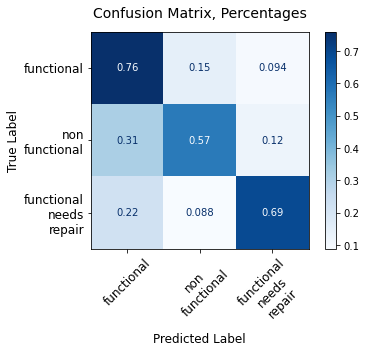

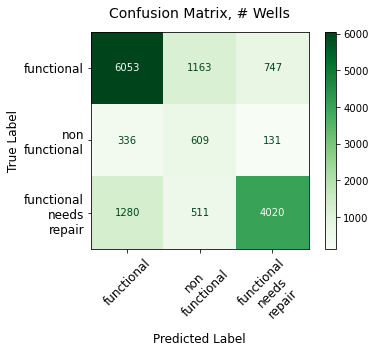

In [359]:
# Optimal Parameters, n=50, p=51: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 
#                      'min_samples_split': 2, 'n_estimators': 100}

# using n=125 with parameters for n=50 gives a good accuracy result 
# but worse performance on false negatives  (.32, .22)


df_SMOTE_rf, X_train_SMOTE_rf, \
clf_rf, rf_train_score, rf_test_score, \
rf_params, rf_imp_table, \
rf_summ_imp_table = rf_model_run(df, features, features_top_n, all_model_features, 
                                 n=125, p=126, run_SMOTE=True, test_size=0.25, 
                                 random_state=123, criterion='entropy', n_estimators=100, 
                                 max_depth=20, n_jobs=-1, min_samples_leaf=1, min_samples_split=2)



##### Feature importance findings

In [360]:
rf_imp_table.head(30)

Importance
quantity_group_enough                          0.058226
extraction_type_class_other                    0.049438
waterpoint_type_other                          0.048217
quantity_group_insufficient                    0.043979
lga_duplicate_Bariadi                          0.028741
payment_pay per bucket                         0.027693
payment_pay monthly                            0.026210
waterpoint_type_communal standpipe             0.021410
source_spring                                  0.019368
source_river                                   0.018985
payment_unknown                                0.018117
permit_True                                    0.017034
lga_duplicate_Kigoma Rural                     0.016922
source_machine dbh                             0.016907
management_vwc                                 0.016767
waterpoint_type_communal standpipe multiple    0.016745
funder_duplicate_government_of_tanzania        0.016369
public_meeting_True                            0.016092
source_shallow well                            0.015552
funder_duplicate_other                         0.015440
quantity_group_seasonal                        0.015301
water_quality_unknown                          0.014191
waterpoint_type_hand pump                      0.013672
extraction_type_class_handpump                 0.013335
extraction_type_class_submersible              0.013278
water_quality_soft                             0.011609
lga_duplicate_Njombe                           0.011182
payment_pay annually                           0.010863
funder_duplicate_missing                       0.010771
funder_duplicate_dwsp                          0.010738

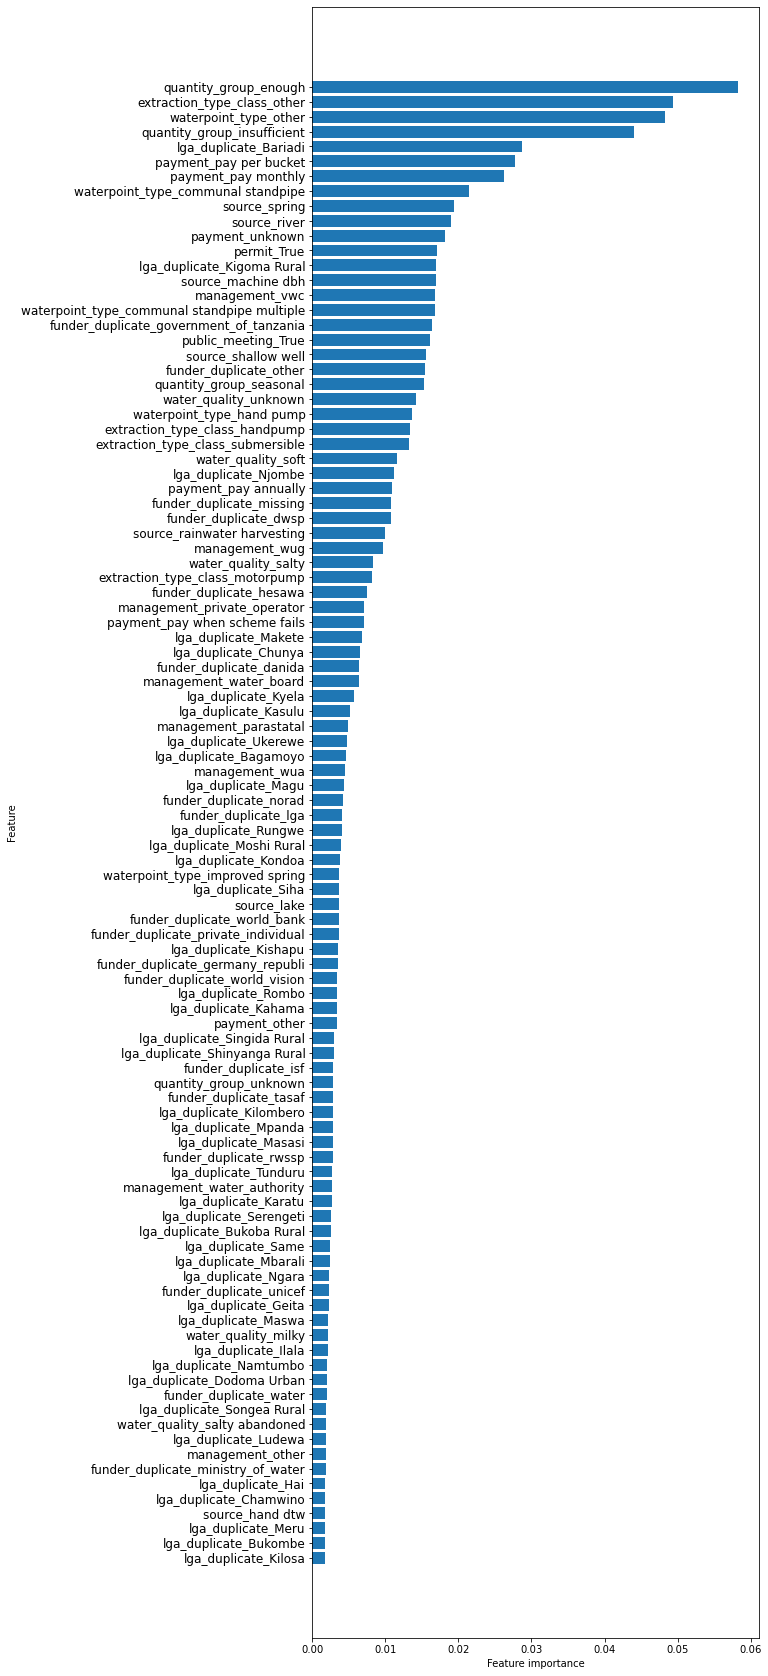

In [362]:
plot_feature_importances(rf_imp_table, n=100)

## Commentary:  Random Forest models

As with both decision trees and bagged trees, we find that rebalancing is necessary to minimize costly false negative errors.  Further, max_depth = 20 vs. max_depth=30 makes a big difference in both training and test scores, and can result in further minimizing false negatives; however, it's important to review the confusion matrix for any given result to evaluate performance in reducing false negatives. 

Finally, as model performance increases, the overall importance of the LGA feature increases.

# Modeling:  Gradient Boost and AdaBoost

Baseline gradient boosting and AdaBoost don't perform particularly well relative to other models.  In the interest of time, I'm moving on to XGBoost and SVM approaches, rather than spending time optimizing hyperparameters for these boosting algorithms.

# Modeling:  XGBoost

## Baseline model, default parameters

In [382]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [383]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


In [384]:
df_n, X_train, X_test, \
y_train, y_test  = top_n_encode_tts(df, features, features_top_n, all_model_features,
                                    n=125, p=126, test_size=0.25, random_state=123)


In [385]:
clf_xgb = xgb.XGBClassifier(random_state=123)
clf_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob', random_state=123)

In [386]:
training_preds = clf_xgb.predict(X_train)

In [387]:
val_preds = clf_xgb.predict(X_test)

In [388]:
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 74.44%
Validation accuracy: 73.91%


Training Accuracy: 85.07%
Validation accuracy: 78.96%

Individual feature importances, top 10


Importance
waterpoint_type_other      0.029932
lga_duplicate_Kongwa       0.012922
quantity_group_seasonal    0.012673
lga_duplicate_Rombo        0.011806
lga_duplicate_Kahama       0.009962
lga_duplicate_Bariadi      0.009664
quantity_group_unknown     0.009559
lga_duplicate_Makete       0.009051
lga_duplicate_Hanang       0.008958
lga_duplicate_Geita        0.008561


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.525668
funder_     0.297731
waterpo     0.040991
quantit     0.030417
source_     0.028676
managem     0.025003
extract     0.019549
water_q     0.016494
payment     0.012113
permit_     0.001737
public_     0.001621


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
lga_dup     0.383551
funder_     0.059590
waterpo     0.034316
quantit     0.030417
source_     0.017697
extract     0.009555
water_q     0.003802
managem     0.003629

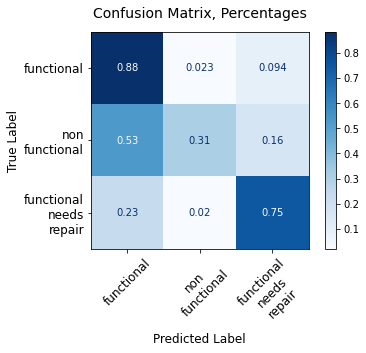

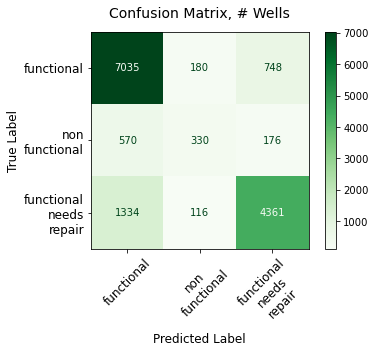

In [389]:
# Running with parameters learning_rate=0.6, max_depth=15, random_state=123, 
# min_child_weight=1, subsample=0.7, n_estimators=100, n_jobs=-1, cache_size=1000

clf_xgb, training_accuracy, \
val_accuracy, imp_table, \
summ_imp_table, summ_imp_sub_table = model_xgb_tables(df_n, X_train=X_train, X_test=X_test, 
                                                      y_train=y_train, y_test=y_test, 
                                                      learning_rate=0.6, max_depth=15, 
                                                      random_state=123, min_child_weight=1, 
                                                      subsample=0.7, n_estimators=100, 
                                                      n_jobs=-1, cache_size=1000, 
                                                      num_feats_incl=100)


## XGB: SMOTE rebalanced data

### INSTALLER, LGA:  n=125, max_depth=15

In [315]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [394]:
features = ['installer', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['installer', 'lga']

all_model_features = ['installer_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


In [395]:
df_n, X_train_SMOTE, X_test, \
y_train_SMOTE, y_test  = SMOTE_top_n_tts(df, features, features_top_n, 
                                         all_model_features, n=125, p=126, 
                                         test_size=0.25, random_state=123)

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})


Training Accuracy: 84.87%
Validation accuracy: 74.34%

Individual feature importances, top 10


Importance
lga_duplicate_Bariadi          0.033472
lga_duplicate_Makete           0.025046
lga_duplicate_Siha             0.019400
lga_duplicate_Kigoma Rural     0.016053
lga_duplicate_Rombo            0.015081
lga_duplicate_Kongwa           0.013032
lga_duplicate_Kyela            0.012701
lga_duplicate_Ludewa           0.011462
extraction_type_class_other    0.011321
lga_duplicate_Njombe           0.010527


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.596081
install     0.263442
source_     0.027659
extract     0.022771
managem     0.021684
quantit     0.020372
waterpo     0.018717
payment     0.014300
water_q     0.012181
public_     0.001403
permit_     0.001389


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
lga_dup     0.470655
install     0.066069
source_     0.017798
quantit     0.017470
extract     0.014927
waterpo     0.011120
payment     0.003803
water_q     0.003391

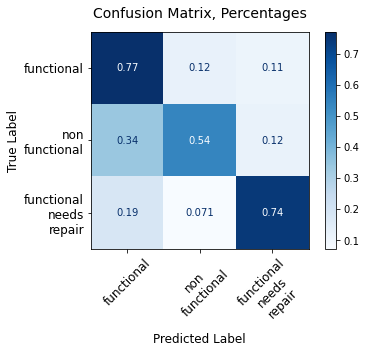

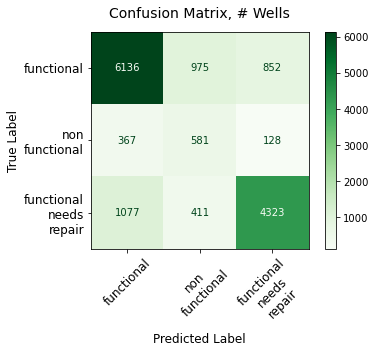

In [396]:
clf_xgb, training_accuracy_xgb_SMOTE, \
val_accuracy_xgb_SMOTE, \
imp_table_xgb_SMOTE, \
summ_imp_table_xgb_SMOTE, \
summ_imp_sub_table_xgb_SMOTE = model_xgb_tables(df_n, X_train_SMOTE, X_test, y_train_SMOTE, 
                                                y_test, random_state=123, max_depth=15, 
                                                learning_rate=0.6, min_child_weight=1, 
                                                subsample=0.7, n_estimators=100, n_jobs=-1, 
                                                cache_size=1000, num_feats_incl=100)


### FUNDER, LGA, n=125; max_depth=15

In [406]:
df.head(3)

funder     installer     wpt_name          basin subvillage  \
id                                                                         
69572         roman         roman         none     Lake Nyasa   mnyusi_b   
8776        grumeti       grumeti     zahanati  Lake Victoria    nyamara   
34310  lottery_club  world_vision  kwa_mahundi        Pangani    majengo   

        region        lga      ward public_meeting permit construction_year  \
id                                                                            
69572   Iringa     Ludewa  Mundindi           True  False              1999   
8776      Mara  Serengeti     Natta            NaN   True              2010   
34310  Manyara  Simanjiro   Ngorika           True   True              2009   

      extraction_type_class management         payment water_quality  \
id                                                                     
69572               gravity        vwc    pay annually          soft   
8776                gravity        wug       never pay          soft   
34310               gravity        vwc  pay per bucket          soft   

      quantity_group                source              waterpoint_type  \
id                                                                        
69572         enough                spring           communal standpipe   
8776    insufficient  rainwater harvesting           communal standpipe   
34310         enough                   dam  communal standpipe multiple   

      status_group  pop_binned  
id                              
69572   functional  (100, 150]  
8776    functional  (200, 300]  
34310   functional  (200, 300]

In [407]:
# # Last output (funder, lga, management, permit, public_meeting, max_depth=15):  
# ----------------
# Grid Search found the following optimal parameters: 
# learning_rate: 0.6
# max_depth: 15
# min_child_weight: 1
# n_estimators: 100
# subsample: 0.7

features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


In [408]:
# Running n=125

df_n, X_train_SMOTE, X_test, \
y_train_SMOTE, y_test  = SMOTE_top_n_tts(df, features, features_top_n, 
                                         all_model_features, n=125, p=126, 
                                         test_size=0.25, random_state=123)

Counter({0: 24296, 2: 17013, 1: 3241})
Counter({0: 24296, 1: 24296, 2: 24296})


Training Accuracy: 85.73%
Validation accuracy: 74.94%

Individual feature importances, top 10


Importance
lga_duplicate_Bariadi          0.032915
lga_duplicate_Kigoma Rural     0.020907
lga_duplicate_Makete           0.015684
lga_duplicate_Kongwa           0.014564
lga_duplicate_Siha             0.013451
lga_duplicate_Rombo            0.013188
extraction_type_class_other    0.012909
lga_duplicate_Kyela            0.011203
lga_duplicate_Njombe           0.010823
lga_duplicate_Chunya           0.010807


Roll-up summary feature importance table, all features


Importance
var_abbr            
lga_dup     0.586990
funder_     0.262168
source_     0.029204
extract     0.027144
managem     0.022706
quantit     0.021565
waterpo     0.018533
payment     0.015393
water_q     0.013359
permit_     0.001492
public_     0.001447


Roll-up summary feature importances, summing up top 100 most important features ONLY:


Importance
var_abbr            
lga_dup     0.470114
funder_     0.048562
quantit     0.018555
extract     0.017290
source_     0.016775
waterpo     0.011058
payment     0.004278
water_q     0.003564

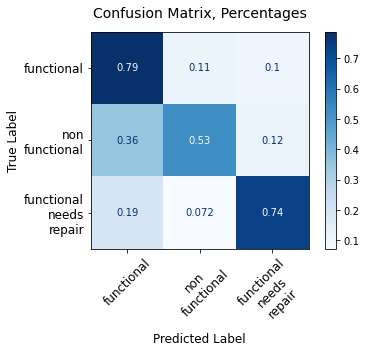

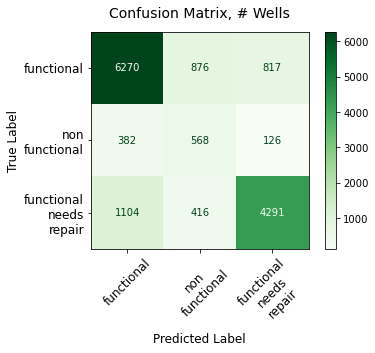

In [409]:
clf_xgb, training_accuracy_xgb_SMOTE, \
val_accuracy_xgb_SMOTE, \
imp_table_xgb_SMOTE, \
summ_imp_table_xgb_SMOTE, \
summ_imp_sub_table_xgb_SMOTE = model_xgb_tables(df_n, X_train_SMOTE, X_test, 
                                                y_train_SMOTE, y_test, random_state=123, 
                                                learning_rate=0.6, max_depth=15, 
                                                min_child_weight=1, subsample=0.7, 
                                                n_estimators=100, n_jobs=-1, 
                                                cache_size=1000, num_feats_incl=100)


In [410]:
imp_table_xgb_SMOTE[:50]

Importance
lga_duplicate_Bariadi               0.032915
lga_duplicate_Kigoma Rural          0.020907
lga_duplicate_Makete                0.015684
lga_duplicate_Kongwa                0.014564
lga_duplicate_Siha                  0.013451
lga_duplicate_Rombo                 0.013188
extraction_type_class_other         0.012909
lga_duplicate_Kyela                 0.011203
lga_duplicate_Njombe                0.010823
lga_duplicate_Chunya                0.010807
quantity_group_seasonal             0.010099
lga_duplicate_Ludewa                0.009909
lga_duplicate_Chamwino              0.009221
lga_duplicate_Mkinga                0.008461
lga_duplicate_Karatu                0.008310
lga_duplicate_Iringa Rural          0.007892
lga_duplicate_Kondoa                0.007869
lga_duplicate_Hanang                0.007717
lga_duplicate_Dodoma Urban          0.007135
waterpoint_type_other               0.007089
lga_duplicate_Muheza                0.006855
source_lake                         0.006801
lga_duplicate_Bukombe               0.006763
lga_duplicate_Muleba                0.006219
lga_duplicate_Rungwe                0.006119
lga_duplicate_Pangani               0.006098
source_rainwater harvesting         0.005979
lga_duplicate_Magu                  0.005826
lga_duplicate_Kisarawe              0.005823
lga_duplicate_Sengerema             0.005591
lga_duplicate_Kilolo                0.005565
lga_duplicate_Songea Rural          0.005521
lga_duplicate_Kahama                0.005426
funder_duplicate_tardo              0.005374
lga_duplicate_Meru                  0.005342
funder_duplicate_germany_republi    0.005321
lga_duplicate_Tunduru               0.005257
lga_duplicate_Singida Urban         0.005180
lga_duplicate_Lushoto               0.005179
funder_duplicate_lga                0.005171
funder_duplicate_hifab              0.005101
funder_duplicate_missing            0.004842
lga_duplicate_Masasi                0.004829
lga_duplicate_Korogwe               0.004822
lga_duplicate_Mpanda                0.004796
lga_duplicate_Geita                 0.004673
lga_duplicate_Ukerewe               0.004654
funder_duplicate_aict               0.004601
quantity_group_unknown              0.004450
lga_duplicate_Bukoba Rural          0.004393

In [411]:
summ_imp_table_xgb_SMOTE   

Importance
var_abbr            
lga_dup     0.586990
funder_     0.262168
source_     0.029204
extract     0.027144
managem     0.022706
quantit     0.021565
waterpo     0.018533
payment     0.015393
water_q     0.013359
permit_     0.001492
public_     0.001447

## Findings:  XGBoost

XGBoost provides highest overall accuracy scores of any of the models used so far.  XGB also provides good--but not great--reduction of false negatives.  

Although the reduction of false negatives isn't as good as for class_weight='balanced' decision tree models, the overall accuracy is higher, and  it's worthwhile to compare features for XGB models with models that provide good performance on reducing false negatives. 

# Modeling:  Support Vector Machines

## FUNDER, LGA (n=100), permit, public_meeting; C=1.0 (default), gamma='scale' (default), class_weight='balanced'

In [428]:
df.head()

funder     installer              wpt_name  \
id                                                        
69572         roman         roman                  none   
8776        grumeti       grumeti              zahanati   
34310  lottery_club  world_vision           kwa_mahundi   
67743        unicef        unicef  zahanati_ya_nanyumbu   
19728   action_in_a       artisan               shuleni   

                         basin  subvillage   region        lga        ward  \
id                                                                           
69572               Lake Nyasa    mnyusi_b   Iringa     Ludewa    Mundindi   
8776             Lake Victoria     nyamara     Mara  Serengeti       Natta   
34310                  Pangani     majengo  Manyara  Simanjiro     Ngorika   
67743  Ruvuma / Southern Coast  mahakamani   Mtwara   Nanyumbu    Nanyumbu   
19728            Lake Victoria  kyanyamisa   Kagera    Karagwe  Nyakasimbi   

      public_meeting permit construction_year extraction_type_class  \
id                                                                    
69572           True  False              1999               gravity   
8776             NaN   True              2010               gravity   
34310           True   True              2009               gravity   
67743           True   True              1986           submersible   
19728           True   True           Missing               gravity   

      management         payment water_quality quantity_group  \
id                                                              
69572        vwc    pay annually          soft         enough   
8776         wug       never pay          soft   insufficient   
34310        vwc  pay per bucket          soft         enough   
67743        vwc       never pay          soft            dry   
19728      other       never pay          soft       seasonal   

                     source              waterpoint_type    status_group  \
id                                                                         
69572                spring           communal standpipe      functional   
8776   rainwater harvesting           communal standpipe      functional   
34310                   dam  communal standpipe multiple      functional   
67743           machine dbh  communal standpipe multiple  non functional   
19728  rainwater harvesting           communal standpipe      functional   

       pop_binned  
id                 
69572  (100, 150]  
8776   (200, 300]  
34310  (200, 300]  
67743   (50, 100]  
19728     (-1, 0]

In [429]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


In [430]:
# features:  installer & scheme_name (n=100); region

df_svm, X, y = top_n_encode(df, features, features_top_n, all_model_features, n=100, p=101)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

Gamma = scale
C = 1.0
Training Accuracy: 72.19%
Validation accuracy: 69.99%



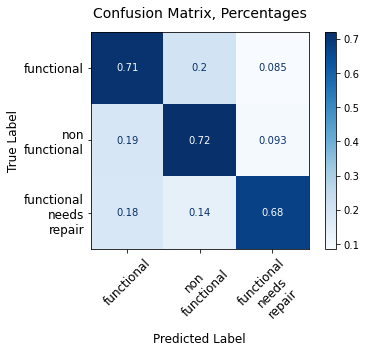

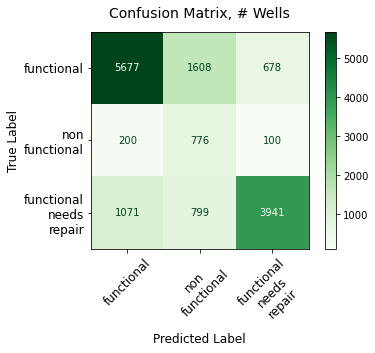

In [431]:
# function just for SVM modeling (takes in X_train, y_train, X_test, y_test from above)

clf_svm, svm_training_accuracy, \
svm_val_accuracy = model_svm(df_svm, X_train, y_train, X_test, y_test, C=1.0, gamma='scale', 
                             random_state=123, cache_size=1000, class_weight='balanced')


## FUNDER, LGA (n=125); C=1.0 (default), gamma=50, class_weight='balanced'

In [442]:
# df = df_train1.copy()    # run this cell if dataframe reset is needed
df.head()

funder     installer              wpt_name  \
id                                                        
69572         roman         roman                  none   
8776        grumeti       grumeti              zahanati   
34310  lottery_club  world_vision           kwa_mahundi   
67743        unicef        unicef  zahanati_ya_nanyumbu   
19728   action_in_a       artisan               shuleni   

                         basin  subvillage   region        lga        ward  \
id                                                                           
69572               Lake Nyasa    mnyusi_b   Iringa     Ludewa    Mundindi   
8776             Lake Victoria     nyamara     Mara  Serengeti       Natta   
34310                  Pangani     majengo  Manyara  Simanjiro     Ngorika   
67743  Ruvuma / Southern Coast  mahakamani   Mtwara   Nanyumbu    Nanyumbu   
19728            Lake Victoria  kyanyamisa   Kagera    Karagwe  Nyakasimbi   

      public_meeting permit construction_year extraction_type_class  \
id                                                                    
69572           True  False              1999               gravity   
8776             NaN   True              2010               gravity   
34310           True   True              2009               gravity   
67743           True   True              1986           submersible   
19728           True   True           Missing               gravity   

      management         payment water_quality quantity_group  \
id                                                              
69572        vwc    pay annually          soft         enough   
8776         wug       never pay          soft   insufficient   
34310        vwc  pay per bucket          soft         enough   
67743        vwc       never pay          soft            dry   
19728      other       never pay          soft       seasonal   

                     source              waterpoint_type    status_group  \
id                                                                         
69572                spring           communal standpipe      functional   
8776   rainwater harvesting           communal standpipe      functional   
34310                   dam  communal standpipe multiple      functional   
67743           machine dbh  communal standpipe multiple  non functional   
19728  rainwater harvesting           communal standpipe      functional   

       pop_binned  
id                 
69572  (100, 150]  
8776   (200, 300]  
34310  (200, 300]  
67743   (50, 100]  
19728     (-1, 0]

In [443]:
features = ['funder', 'lga', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 
            'extraction_type_class', 'status_group', 'waterpoint_type', 'permit', 'public_meeting']

features_top_n = ['funder', 'lga']

all_model_features = ['funder_duplicate', 'lga_duplicate', 'management', 'permit', 'public_meeting', 
                      'payment', 'water_quality', 'quantity_group', 'source', 
                      'extraction_type_class', 'status_group', 'waterpoint_type']


In [444]:
# run for non-resampled data

df_svm, X, y = top_n_encode(df, features, features_top_n, all_model_features, n=125, p=126)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

Gamma = 50
C = 1.0
Training Accuracy: 80.75%
Validation accuracy: 67.57%



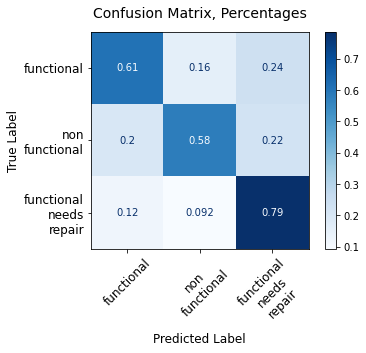

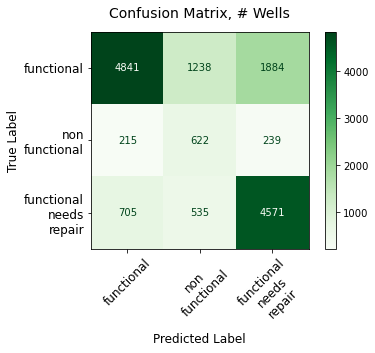

In [445]:
# function just for SVM modeling (takes in X_train, y_train, X_test, y_test from above)

clf_svm, svm_training_accuracy, \
svm_val_accuracy = model_svm(df_svm, X_train, y_train, X_test, y_test, C=1.0, gamma=50, 
                             random_state=123, cache_size=1000, class_weight='balanced')

# Last output (class_weight='balanced'; installer, scheme_name, region; C=1.0, gamma='scale')
# Gamma = 50
# C = 1.0
# Training Accuracy: 79.91%
# Validation accuracy: 68.58%

# higher gamma value (50) yields slightly higher training score but lower test score.  It also 
# does a better job of minimizing the false negative errors.

## Commentary:  SVM

My initial exploration of SVM models using the default kernel and performing a bit of hyperparameter tuning did not provide significant performance improvement--especially over XGB.

# Findings

## Model Performance: Accuracy and Reduction of False Negatives 
* Imbalanced dataset (original)
  * Training accuracies ranged 77% to 85%
  * Test accuracies ranged from 74% to 80%
  * False negatives were unacceptably high  (up to 77% and 40% for mis-classification of 'functional needs repair' and 'non functional' wells as 'functional', respectively)
* SMOTE resampled data
  * Training accuracies ranged 73% to 80%
  * Test accuracies ranged from 69% to 78%
  * False negatives were noticeably better than for imbalanced dataset, but still higher than for models run with class_weight='balanced' (~30-35% and ~23-30% for mis-classification of 'functional needs repair' and 'non functional' wells as 'functional', respectively)
* class_weight='balanced' (in models where this parameter is available)
  * Training accuracies ranged 65% to 78%
  * Test accuracies ranged from 62% to 74%
  * Best performance of the three options for false negatives (as low as 17% and 17% for mis-classification of 'functional needs repair' and 'non functional' wells as 'functional', respectively)
*   **Conclusion--Class imbalances:**  There is a significant trade-off between overall accuracy and minimizing costly false negatives by addressing class imbalances that contribute to the errors in the smaller classes ('non-functional' and 'functional needs repair'). 
  
## Feature Importances 
* At a macro level, I found that the features that showed up most frequently in the aggregate feature importance list were the following (roughly in order of importance):
     * Quantity ('dry', 'enough', 'insufficient', 'seasonal', or 'unknown')
     * Region or lga (depending on which was used in the model)
     * Waterpoint type (standpipe, borehole, improved spring, cattle trough, other)
     * Installer or funder (depending on which was used in the model)
     * Extraction type (e.g., gravity, hand pump, motor, submersible)
     * Source (e.g., river, spring, shallow well, rainwater harvesting)
     * Payment type (e.g., pay by bucket, pay by month, never pay)
* At a more granular level, the top 30 or so dummy variables tended to include a mix of:
     * Water abundance
     * Waterpoint type
     * Geographic location (e.g., LGA)
     * Extraction type
     * Installer/funder
     * Payment type
* I recommend looking more closely at these values, since they are likely to contain those specific values that have more wells needing replacement or repair

# Possible Future Work

With more time, I would like to explore additional modeling with a subset of parameters:
* As indicated above, most of the models show very similar lists of dummy variables as having the greatest influence on the model algorithms
* While my experience so far is that, regardless which model or subset of variables I use, the accuracy scores remain stubbornly in the 75-80% range, I'd like to find out whether running a smaller subset of dummy variables might improve results
* There are significant holes in this data set (e.g., missing values or values such as ‘other’ for type of well); with more time, I would like to research a few of these values, such as:
  * ‘Other’ in the category ‘extraction_type’, as the majority of wells in this category are non-functional
  * Year constructed—no date recorded for significant percentage of wells; do these wells have something in common, such as:
    * Clustered in certain locations where data was/is not collected?
    * Constructed before a certain date?
    * Constructed by certain installers or funded by certain funders?
    * Of a certain type, e.g., handpump?  

Some features that I was not able to use due to incomplete information are likely to have an impact on the accuracy scores, but would require more research to flesh out
* Significant funding for projects comes from outside Tanzania
  * My initial quick review of some of the top funders and installers suggests that funding / installation management by certain international entities have a substantially higher rate of functional projects, with few projects in need of maintenance or equipment replacement--most notably Germany (perhaps not surprising, given the cultural emphasis on efficiency and high standards for technical expertise and performance
  * There is some geographic / country information on a small subset of funders and/or the installers, but this information is not captured in the dataset provided, except incidentallly (e.g., the rare country reference in the name of the funder or installer)
  * Thus, it would be necessary to research these entities to identify their locations
  * As there are at least 100 that have funded dozens or hundreds of projects, this would be a time-consuming effort.
* Latitude / longitude—Looking at functional status of wells at various geographic locations to identify possible patterns due to geological differences
